# **How do annual members and casual riders use Cyclistic bikes differently?** 

Setting up environment in R

In [1]:
# Install Necessary Packages.

packages <- c("tidyverse","data.table","skimr","scales","hms","ggridges")

if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
  install.packages(setdiff(packages, rownames(installed.packages())))  
}

In [2]:
# Load Libraries 

library(tidyverse)
library(skimr)
library(data.table)
library(scales)
library(hms)
library(patchwork)
library(ggridges)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘packag


# **Introduction**

This analysis is based on the **Cyclistic bike-share analysis case study**, which is part of the [Google Data Analytics Professional Certification on Coursera](https://www.coursera.org/) capstone project.

Cyclistic is a fictitious Chicago-based bike-sharing company. 

The data used for this analysis is sourced from the [**divvy-tripdata S3 bucket**]( https://divvy-tripdata.s3.amazonaws.com/index.html) and/or the [**Kaggle dataset**]( https://www.kaggle.com/datasets/antonukolga/cyclistic-bike-share-data-12-months).
The data is made available under a specific license provided by [**Motivate International Inc**]( https://ride.divvybikes.com/data-license-agreement) for purposes of analysis.

The phases involved in this analysis are as follows:
* **Ask:** Define the questions and goals of the analysis.
* **Prepare:** Gather and clean the data for analysis.
* **Process:** Transform and structure the data for further analysis.
* **Analyze:** Perform data analysis and derive insights. 

 
An [R notebook on Kaggle](https://www.kaggle.com/code/antonukolga/are-users-cyclistic-different/) is utilized to perform first 4 phases of data analysis and document the process.

* **Share:** Communicate the findings and insights using visualizations and a [Tableau dashboard]().
* **Act:** Present the final analysis and recommendations in a [formal presentation]().

# **Ask**

According to the [**Case Study documentation**]( https://d3c33hcgiwev3.cloudfront.net/aacF81H_TsWnBfNR_x7FIg_36299b28fa0c4a5aba836111daad12f1_DAC8-Case-Study-1.pdf?Expires=1684972800&Signature=RXn0OdlNwPho3equbFsapYbRRalouYhh0ZebpRsd6I4oKQajBXxg2aeMdnULIHZD2Kzh1R~c~JOC0Aj0KS6UBOHbhALsk6YWYf5Mhedd1UkQgdLrsBb6Dg0Ke4rDLnAYxRVwpL81H591hs4D5R~3BnGg8K9kBTJCsOsAzRwFAAM_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A ) 

The Marketing Team is analyzing the Cyclistic historical bike trip data to identify trends. Three questions will guide the future marketing program:

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

## Our Business Task 

Analyze and identify the variations in bike usage patterns between annual members and casual riders of Cyclistic, in order to gain insights into their distinct behaviors and preferences.

## Key Stakeholders

* Lily Moreno (Director of Marketing): She wants to design a new marketing strategy to convert casual riders into annual members and maximize the number of annual memberships.
* Cyclistic Marketing Analytics Team: They are responsible for collecting, analyzing, and reporting data to guide Cyclistic's marketing strategy.
* Cyclistic Executive Team: They will decide whether to approve the recommended marketing program based on the insights and recommendations provided.
* Cyclistic Customers: Understanding the differences in bike usage patterns can help improve the overall customer experience and tailor marketing efforts to their needs.

## Deliverables

* A comprehensive analysis comparing the usage patterns of annual members and casual riders, including key metrics such as trip duration, trip frequency, popular routes, and peak usage hours and ather.
* Data-driven insights and visualizations that highlight the significant differences between the two user groups.
* Recommendations on how Cyclistic can leverage these insights to improve its marketing strategy and convert casual riders into annual members.
* A report summarizing the findings, insights, and recommendations in a clear and concise manner for presentation to the Cyclistic executive team.

# **Prepare**

## Data Credibility

The data used in this analysis is sourced from a public bike-sharing company. It spans from 2013 to March 2023. The data files do not adhere to a consistent naming convention, as they are sometimes organized by quarter, month, or the entire year, resulting in varying file names. Similarly, the column names have undergone changes over the years, with some columns being added or removed. Despite these variations, the data appears to be well-maintained and originates directly from the company itself. It comprises a substantial number of entries and contains valuable information for analysis purposes.

## Data Structure

For this analysis, we will focus on the data available from April 2020 until May 2023 (and potentially beyond if the data recording method remains unchanged). This time period is considered the most relevant to the business task and is organized into separate files for each month of trip logs, offering a useful data organization structure.

The analysis is based on a structure of trip log records with the following format:
- The trip log data is available in separate files, each corresponding to a specific month and containing records of trips during that period.
- Each trip log record includes various attributes and variables that describe the details of the trip, such as ride ID, start and end date and time, start and end coordinates (latitude and longitude), bike type used, and other relevant information.
- The trip log data can include information about both anonymous users (without individually identifiable information) and registered users, including Cyclistic members and non-members.


## Data colecting

Considering the need to analyze differences in behavior between members and non-members, this code prompts the user to input the number of months they wish to analyze the data for.

In [3]:
# Specify the directory path for the CSV files
path <- "/kaggle/input/cyclistic-bike-share-data-12-months/csv_files/" 

# Sets working directory to simplify calls to data
setwd("/kaggle/input/cyclistic-bike-share-data-12-months/csv_files/") 

# Displays working directory
getwd() 

[1] "/kaggle/input/cyclistic-bike-share-data-12-months/csv_files"

In [4]:
# Get a list of all available files in the directory
file_names <- list.files(path, full.names = TRUE)

# Print the list of file names
cat("The number of months for which data is available is:", length(file_names), "\nfiles:\n")
for (file_name in file_names) {
  cat(file_name, "\n")
}

The number of months for which data is available is: 11 
files:
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202207-divvy-tripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202208-divvy-tripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202209-divvy-publictripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202210-divvy-tripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202211-divvy-tripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202212-divvy-tripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202301-divvy-tripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202302-divvy-tripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202303-divvy-tripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/csv_files//202304-divvy-tripdata.csv 
/kaggle/input/cyclistic-bike-share-data-12-months/

Read data and examine the number of columns, the number of trips recorded, and the percentage of missing values for each available month.

In [5]:
# Function to read files and store data tables in a list
readFiles <- function(file_names) {
  dts <- list()  # Create an empty list to store data tables
  
  for (file_path in file_names) {
    file_name <- tools::file_path_sans_ext(basename(file_path))  # Extract the file name without extension
    dt <- fread(file_path)  # Read the file using fread from the data.table package, resulting in a data table
    dts[[file_name]] <- dt  # Add the data table to the list with the file name as the key
  }
  
  return(dts)  # Return the list of data tables
}

In [6]:
# Read the files and store the data tables in dts list
dts <- readFiles(file_names) 

In [7]:
# Set the seed for reproducibility
set.seed(321)

# Select a random month from the available data
random_month <- sample(1:length(file_names), 1)

# Take a look on a few rows from one of the months
head(dts[[random_month]],3)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.91824,-87.65711,41.92217,-87.63889,member
0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.94011,-87.64545,41.92217,-87.63889,casual
E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.88592,-87.65113,41.89435,-87.62280,member


In [8]:
# Function to calculate data information for a given data table
calculateDataInfo <- function(dt, file_name) {
  numb_rows <- nrow(dt) 
  empty <- ifelse(numb_rows == 0, "yes", "no")  # Check if the data table is empty
  
  # Calculate the number of rows with null values
  null_rows <- sum(apply(is.na(dt), 1, any))
  
  # Calculate the number of rows with empty values
  empty_rows <- sum(apply(dt, 1, function(x) any(x == "")))
  
  # Calculate the percentage of missing rows (null or empty)
  percent_missing_rows <- round((null_rows + empty_rows) / numb_rows * 100, 2)
  
  return(data.table(file_name = file_name,
                    empty_data = empty,
                    numb_columns = ncol(dt),
                    numb_rows = numb_rows,
                    numb_null_rows = null_rows,
                    numb_empty_rows = empty_rows,
                    percent_missing_rows = percent_missing_rows))
}

In [9]:
# Function to get data information for multiple data table
getDataInfo <- function(dts) {
  data_info_read <- data.table(file_name = character(),
                               empty_data = character(),
                               numb_columns = numeric(),
                               numb_rows = numeric(),
                               numb_null_rows = numeric(),
                               numb_empty_rows = numeric(),
                               percent_missing_rows = numeric())
  
  # Iterate over each data table in the list
  for (file_name in names(dts)) {
    dt <- dts[[file_name]]
    
    # Check if the data table is null (empty)
    if (is.null(dt)) {
      # If the data table is null, add a row with all values set to 0
      data_info_read <- rbind(data_info_read, data.table(file_name = file_name,
                                                         empty_data = "yes",
                                                         numb_columns = 0,
                                                         numb_rows = 0,
                                                         numb_null_rows = 0,
                                                         numb_empty_rows = 0,
                                                         percent_missing_rows = 0))
    } else {
      # If the data table is not null, calculate its data information
      data_info <- calculateDataInfo(dt, file_name)
      data_info_read <- rbind(data_info_read, data_info)
    }
  }
  
  return(data_info_read)
}

In [10]:
# Get data_info_read
data_info_read <- getDataInfo(dts)

In [11]:
# Add a summary row
sum_numb_columns = round(mean(data_info_read$numb_columns), 1)
sum_numb_rows = sum(data_info_read$numb_rows)
sum_numb_null_rows = sum(data_info_read$numb_null_rows)
sum_numb_empty_rows = sum(data_info_read$numb_empty_rows)
sum_percent_missing_rows =  round((sum_numb_null_rows+ sum_numb_empty_rows)/ sum_numb_rows * 100, 2)

# Create a summary row with the calculated values
summary_row <- data.table(file_name = "Summary",
                          empty_data = "",
                          numb_columns = sum_numb_columns,
                          numb_rows = sum_numb_rows,
                          numb_null_rows = sum_numb_null_rows,
                          numb_empty_rows = sum_numb_empty_rows,
                          percent_missing_rows = sum_percent_missing_rows)

# Combine the summary row with the data information table
read_data_info <- rbind(data_info_read, summary_row)
read_data_info

file_name,empty_data,numb_columns,numb_rows,numb_null_rows,numb_empty_rows,percent_missing_rows
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
202207-divvy-tripdata,no,13,823488,947,180808,22.07
202208-divvy-tripdata,no,13,785932,843,180607,23.09
202209-divvy-publictripdata,no,13,701339,712,166194,23.80
202210-divvy-tripdata,no,13,558685,475,144416,25.93
202211-divvy-tripdata,no,13,337735,230,81941,24.33
202212-divvy-tripdata,no,13,181806,128,46403,25.59
202301-divvy-tripdata,no,13,190301,127,42017,22.15
202302-divvy-tripdata,no,13,190445,116,40885,21.53
202303-divvy-tripdata,no,13,258678,183,58231,22.58


## Data structure consistency
The next step involves identifying the common column names across all the available data for the selected number of months. This helps ensure consistency in the data structure and facilitates further analysis.

In [12]:
# Get a list of all column names in the data
all_colnames <- lapply(dts, names)

# Find the common column names across all data
common_colnames <- Reduce(intersect, all_colnames)

# Print the results
if (length(common_colnames) == 0) {
  cat("For the last", length(file_names), "months, when data is available, the way data is recorded (stored or transmitted) has changed,
     \nso column names are not uniform for all data.
     \nFurther investigation is needed to ensure consistency in column names across all the available data. ")
} else {
  cat("For the last", length(file_names), "months, when data is available, column names in monthly files are consistent for all data:\n")
  cat(paste(common_colnames, collapse = ", \n"), "\n")
}

For the last 11 months, when data is available, column names in monthly files are consistent for all data:
ride_id, 
rideable_type, 
started_at, 
ended_at, 
start_station_name, 
start_station_id, 
end_station_name, 
end_station_id, 
start_lat, 
start_lng, 
end_lat, 
end_lng, 
member_casual 


The current **column names exhibit consistency across the data**; however, there is room for improvement in terms of representing the actual values they contain.

## Data types consistency. Variation of values and unique values

In the next step, we will examine the data types present in the dataset and assess their consistency across all the available data. This analysis is crucial for gaining insights into the dataset's structure and ensuring that the data types are uniform. By checking the consistency of data types, we can identify any variations or discrepancies that may exist. Understanding the data types will contribute to a better understanding of the dataset's overall structure and aid in further data processing and analysis.

In addition, we will explore the variation of values within each data type and identify unique values if they can be counted across the datasets.This analysis provides valuable insights into the range and diversity of values present in the dataset. By examining the unique values, we can gain an understanding of the distinct categories or levels within a specific column. This exploration helps us identify patterns and potential anomalies in the data that may warrant further investigation.

In [13]:
# Function to check data types consistency
check_data_types <- function(dts) {
  # Common column names across all data tables
  col_names <- common_colnames
  
  # Initialize result data frame
  data_types_data <- data.frame(column = character(),
                        datatype = character(),
                        consistent_col_datatype = character(),
                        numb_unique_values = numeric(),
                        unique_values = character(),
                        stringsAsFactors = FALSE)
  
  # Loop over each column and check if data types are the same
  for (col in col_names) {
          
    data_types <- lapply(dts, function(dt) class(dt[[col]]))
    unique_values <- lapply(dts, function(dt) length(unique(dt[[col]])))
    
    if (length(unique(data_types)) == 1) {
      consistent_col_datatype <- "yes"
    } else {
      consistent_col_datatype <- "no"
    }
    
    if (length(unique(unique_values)) == 1) {
      numb_unique_values <- unique_values[[1]]
                            
    # If there are unique values for all data, get them
      if (numb_unique_values > 0 ) {
        unique_vals <- sort(unique(unlist(lapply(dts, function(dt) unique(dt[[col]])))))
        unique_vals_str <- paste(unique_vals, collapse = ", ")
      } else {
        unique_vals_str <- ""
      }
    } else {
      numb_unique_values <- "Inconsistent"
      unique_vals_str <- "Large variation of values"
    }
                            
    
    data_types_data <- rbind(data_types_data, data.frame(column = col,
                                         datatype = data_types[[1]],
                                         consistent_col_datatype = consistent_col_datatype,
                                         numb_unique_values = numb_unique_values,
                                         unique_values = unique_vals_str,
                                         stringsAsFactors = FALSE))
  }
  
  return(data_types_data)
}


In [14]:
# Create data frame with column data type information and data about data variation and unique values
if (length(dts) > 1) {
  # For multiple data tables
  df_about_data <- check_data_types(dts)
  df_about_data
} else if (length(dts) == 1) {
  # For a single data table
  dt <- dts[[1]]
  col_names <- names(dt)
  data_types <- lapply(dt, class)
  unique_values_count <- lapply(dt, function(col) length(unique(col)))
  unique_values_str <- lapply(dt, function(col) {
    if (length(unique(col)) < 5) {
      paste(sort(unique(col)), collapse = ", ")
    } else {
      ""
    }
  })
  
  data_types_data <- data.frame(col_name = col_names,
                        data_type = data_types,
                        unique_values_count = unlist(unique_values_count),
                        unique_values_str = unlist(unique_values_str),
                        stringsAsFactors = FALSE)
  
  data_types_data
}

column,datatype,consistent_col_datatype,numb_unique_values,unique_values
<chr>,<chr>,<chr>,<chr>,<chr>
ride_id,character,yes,Inconsistent,Large variation of values
rideable_type,character,yes,3,"classic_bike, docked_bike, electric_bike"
started_at,POSIXct,yes,Inconsistent,Large variation of values
started_at,POSIXt,yes,Inconsistent,Large variation of values
ended_at,POSIXct,yes,Inconsistent,Large variation of values
ended_at,POSIXt,yes,Inconsistent,Large variation of values
start_station_name,character,yes,Inconsistent,Large variation of values
start_station_id,character,yes,Inconsistent,Large variation of values
end_station_name,character,yes,Inconsistent,Large variation of values


We notice that the "started_at" and "ended_at" columns have the data types POSIXt and POSIXct. The POSIXct data type is a subclass of POSIXt. When we convert a POSIXt column to POSIXct, the resulting column remains a POSIXt object but with a more specific subclass of POSIXct. This means that the class of the column will display as POSIXct, but it still retains the underlying POSIXt structure, including the time zone information. Since all the data is recorded in a single time zone, it is important to consider this during calculations.

Therefore, we can conclude that **the data types are consistent for all the data**.

Also, we can see that the **data variation is significant and diverse across most of the columns**. However, there are two specific columns, namely "member_casual" and "rideable_type", that exhibit unique values representing distinct categories. The "member_casual" column indicates the user type, distinguishing between "casual" and "member" users. On the other hand, the "rideable_type" column represents the type of bike used, with unique values including "classic_bike," "docked_bike," and "electric_bike."

**These unique values in the "member_casual" and "rideable_type"** columns align with the specific business task or requirements, **indicating the correct limitations and categories for these attributes**. It is important to consider these distinctions when performing further analysis or making interpretations based on these columns.

## This data is ROCCC

In terms of bias or credibility in the data, we can assess the data based on the ROCCC criteria:

Reliability: The data is sourced from reputable providers and the data collection methods employed by Cyclistic are considered accurate and consistent, indicating good reliability.

Objectivity: The data is collected objectively, without personal bias or manipulation, ensuring the findings are unbiased and impartial.

Currency: The data covers a relevant date range for the analysis, ensuring its accuracy and relevance to the current context.

Comprehensiveness: The data appears to be comprehensive, capturing a wide range of variables that are relevant to the analysis. It provides a representative sample of Cyclistic's customer base, allowing for a thorough understanding of bike usage patterns.

Context: The data is collected within a specific context, taking into account external factors or events that may have influenced bike usage patterns. This contextual understanding helps in interpreting the data accurately.

## Filtering Out Irrelevant Rides

Some rides where Cyclistic took bikes out of circulation for Quality Control reasons represented by "docked_bike" in "rideable_type" column. As these rides do not align with our business task, we will exclude them from the analysis by removing those data points.

In [15]:
cat("Information about processing each month")

remove_docked_bike_data <- function(dts) {
  for (i in seq_along(dts)) {
    dt <- dts[[i]]
    numb_docked_bike <- sum(dt$rideable_type == "docked_bike", na.rm = TRUE)
    cat("\n", numb_docked_bike," trips on docked_bike for", names(dts)[i], "were excluded")
    dt <- dt[!(rideable_type == "docked_bike"), ]
    dts[[i]] <- dt
  }
  return(dts)
}

dts <- remove_docked_bike_data(dts)

Information about processing each month
 31055  trips on docked_bike for 202207-divvy-tripdata were excluded
 26323  trips on docked_bike for 202208-divvy-tripdata were excluded
 19826  trips on docked_bike for 202209-divvy-publictripdata were excluded
 12614  trips on docked_bike for 202210-divvy-tripdata were excluded
 5886  trips on docked_bike for 202211-divvy-tripdata were excluded
 1925  trips on docked_bike for 202212-divvy-tripdata were excluded
 1738  trips on docked_bike for 202301-divvy-tripdata were excluded
 2195  trips on docked_bike for 202302-divvy-tripdata were excluded
 3020  trips on docked_bike for 202303-divvy-tripdata were excluded
 8887  trips on docked_bike for 202304-divvy-tripdata were excluded
 13092  trips on docked_bike for 202305-divvy-tripdata were excluded

### Chicago + 50 km coordinates boundaries

It is crucial to consider the geographic boundaries of the data.

By checking if all coordinates fall within the specified Chicago area and its 100 km radius, we can ensure that the analysis is focused on the relevant geographical region. This step helps to maintain data integrity, eliminate outliers or irrelevant data points, and improve the accuracy of the analysis results. By incorporating these boundaries, we can confidently analyze the data within the specific geographic context and draw meaningful insights related to the Chicago area.

In [16]:
# Coordinates of Chicago
chicago_lat <- 41.8781
chicago_lon <- -87.6298

# Radius in kilometers
radius_km <- 100

# Approximate latitude boundaries
lat_diff <- radius_km / 111.1  # 1 degree of latitude is approximately 111.1 km
chicago_lat_min <- chicago_lat - lat_diff
chicago_lat_max <- chicago_lat + lat_diff

# Approximate longitude boundaries
lon_diff <- radius_km / (111.1 * cos(chicago_lat * pi/180))  # Adjust for latitude
chicago_lon_min <- chicago_lon - lon_diff
chicago_lon_max <- chicago_lon + lon_diff

# Print the boundaries
cat("Latitude Chicago boundaries:", chicago_lat_min, "to", chicago_lat_max, "\n")
cat("Longitude Chicago boundaries:", chicago_lon_min, "to", chicago_lon_max, "\n")


Latitude Chicago boundaries: 40.97801 to 42.77819 
Longitude Chicago boundaries: -88.83868 to -86.42092 


In [17]:
# Function to check if coordinates are within boundaries
check_coordinates <- function(lat, lon) {
  lat >= chicago_lat_min & lat <= chicago_lat_max & lon >= chicago_lon_min & lon <= chicago_lon_max
}

# Initialize a counter
 sum_rides_outside_boundaries <- 0

# Iterate over each data table in dfs
for (i in seq_along(dts)) {
  dt <- dts[[i]]
  
  # Check start_lat and start_lng columns
  start_within_boundaries <- check_coordinates(dt$start_lat, dt$start_lng)
  
  # Check end_lat and end_lng columns
  end_within_boundaries <- check_coordinates(dt$end_lat, dt$end_lng)
    
  # Count rides outside boundaries (considering missing values)
  rides_outside_boundaries <- sum(!is.na(start_within_boundaries) & !is.na(end_within_boundaries) & (!start_within_boundaries | !end_within_boundaries))

    
  # Filter data to keep only rows within boundaries
  df_filtered <- dt[start_within_boundaries & end_within_boundaries, ]
  
  # Replace the original data table with the filtered one
  dts[[i]] <- df_filtered
  
 sum_rides_outside_boundaries <- sum_rides_outside_boundaries + rides_outside_boundaries
}

# Print the count of rides outside boundaries
cat(sum_rides_outside_boundaries, "of rides outside the Chicago +",radius_km ,"km boundaries or contain missing coordinates values were excluded","\n")


8 of rides outside the Chicago + 100 km boundaries or contain missing coordinates values were excluded 


# **Process**

## Missing and Empty data points

In [18]:
# Function is used to calculate the count of missing rows for each given column in the given data tables
empty_rows_counts <- function(dts) {
  # Initialize an empty data table to store the missing rows count
  empty_counts <- data.table(data_name = character(), 
                             column = character(), 
                             count = integer())

  # Iterate over each data table
  for (i in seq_along(dts)) {
    data_name <- names(dts)[i]  # Get the data name
    columns <- names(dts[[i]]) # Get the columns names

    for (col_name in columns) {
      if (is.numeric(dts[[i]][[col_name]])) {
        col_count <- sum(is.na(dts[[i]][[col_name]]))
        empty_counts <- rbind(empty_counts, data.table(data_name = data_name, column = col_name, count = col_count))
      } else if (inherits(dts[[i]][[col_name]], "POSIXct") || inherits(dts[[i]][[col_name]], "POSIXt")) {
        col_count <- sum(is.na(dts[[i]][[col_name]]))
        empty_counts <- rbind(empty_counts, data.table(data_name = data_name, column = col_name, count = col_count))
      } else if (is.character(dts[[i]][[col_name]])) {
        col_count <- sum(dts[[i]][[col_name]] == "")
        empty_counts <- rbind(empty_counts, data.table(data_name = data_name, column = col_name, count = col_count))
      }
    }
  }

  empty_counts <- dcast(empty_counts, data_name ~ column, value.var = "count", fill = 0)
  return(empty_counts)
}

# Call the missing_rows_counts function with dts data tables
empty_rows <- empty_rows_counts(dts)
empty_rows

data_name,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
202207-divvy-tripdata,0,0,120004,120004,0,0,0,0,0,0,112031,112031,0
202208-divvy-tripdata,0,0,119679,119679,0,0,0,0,0,0,112037,112037,0
202209-divvy-publictripdata,0,0,110473,110473,0,0,0,0,0,0,103780,103780,0
202210-divvy-tripdata,0,0,96142,96142,0,0,0,0,0,0,91355,91355,0
202211-divvy-tripdata,0,0,54029,54029,0,0,0,0,0,0,51957,51957,0
202212-divvy-tripdata,0,0,31030,31030,0,0,0,0,0,0,29283,29283,0
202301-divvy-tripdata,0,0,27713,27713,0,0,0,0,0,0,26721,26721,0
202302-divvy-tripdata,0,0,26763,26622,0,0,0,0,0,0,25605,25473,0
202303-divvy-tripdata,0,0,38255,38255,0,0,0,0,0,0,35910,35910,0




There is a significant number of empty values in the end_station_id and end_station_name columns, as well as the start_station_id and start_station_name columns. Let's visualize the distribution of these missing values using a plot, considering the user type and bike type.

We will create a bar plot to show the counts of missing values for each combination of user type and bike type. 

In [19]:
# Set the working directory to "/kaggle/working"
setwd("/kaggle/working")

# Define the directory to save plots in
plot_dir <- "/kaggle/working/data_plots"
# Create directory if it doesn't exist
if(!dir.exists("data_plots")) {
  dir.create("data_plots")
}

Creating colors for plots

In [20]:
# Original color
original_color <- "#3c94a4"

# Scale the color to a lighter shade for plots
lighter_color <- scales::col_numeric(palette = c(original_color, "white"), domain = c(0, 1))(0.4)

# Generate the interpolated color palette with 4 colors
color_palette <- colorRampPalette(c("#71a1ab", "#d8e8eb"), space = "Lab")(4)

# Create a vector of colors including the original color, interpolated colors, and the lighter color
colors <- c(color_palette)

# A tibble: 4 × 4
  rideable_type member_casual count  percent
  <chr>         <chr>         <dbl>    <dbl>
1 classic_bike  casual            9  0.00839
2 classic_bike  member           14  0.0130 
3 electric_bike casual        43897 40.9    
4 electric_bike member        63411 59.1    


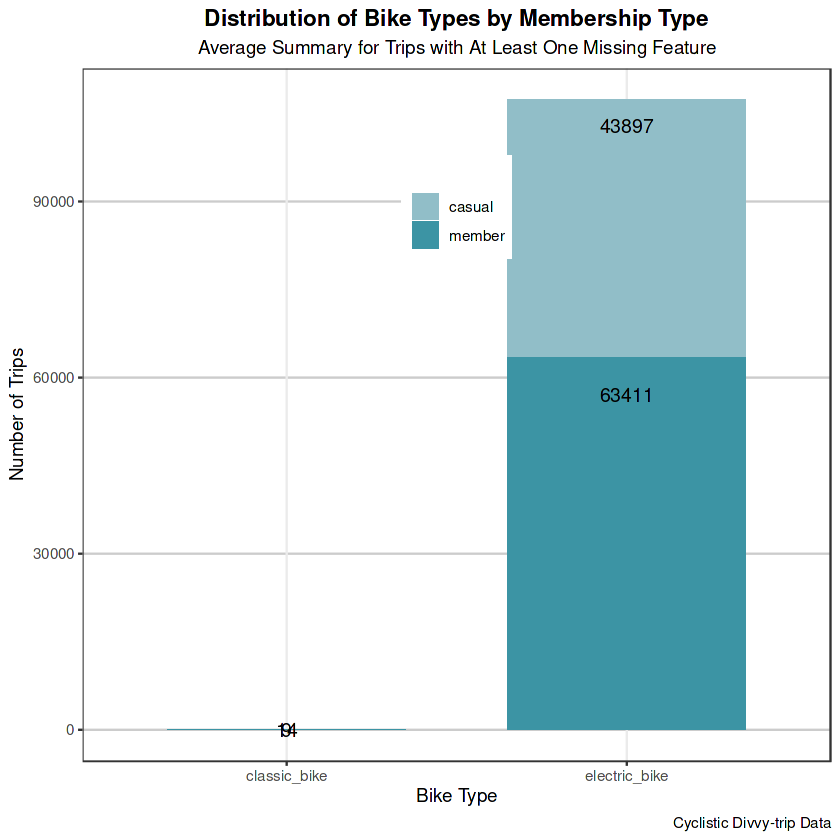

In [21]:
plotAvgDoubleStackedBar <- function(dts, title, subtitle, file_name) {
  # Create summary data for the bar chart
  df_summaries <- lapply(dts, function(dt) {
      df_filtered <- dt[end_station_id == "" | end_station_name == "" | start_station_id == "" | start_station_name == ""]
      df_summary <- df_filtered %>% 
        group_by(rideable_type, member_casual) %>% 
        summarize(count = n(), .groups = 'drop') %>% 
        ungroup() %>% 
        mutate(percent = count / sum(count) * 100)
  })
  
  # Calculate the average summary
  df_avg_summary <- Reduce(function(x, y) { merge(x, y, all = TRUE) }, df_summaries)
  df_avg_summary <- df_avg_summary %>% 
    group_by(rideable_type, member_casual) %>% 
    summarize(count = round(mean(count, na.rm = TRUE)), .groups = 'drop') %>% 
    ungroup() %>% 
    mutate(percent = count / sum(count) * 100)
    print(df_avg_summary)
  
  # Create the stacked bar chart
  p <- ggplot(df_avg_summary, aes(x = rideable_type, y = count, fill = member_casual)) +
    geom_col(position = "stack", width = 0.7) +
    geom_text(aes(label = count, group = member_casual), position = position_stack(vjust =0.9), size = 4) +
    labs(x = "Bike Type", y = "Number of Trips", fill = "", caption = "Cyclistic Divvy-trip Data") +
    scale_fill_manual(values = c(lighter_color,original_color)) +
    theme_bw() +
    theme(legend.position = c(0.5, 0.8),
          panel.grid.major.y = element_line(color = "grey80"),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(angle = 0, hjust = 0.5),
          plot.title = element_text(hjust = 0.5, face = "bold"),
          plot.subtitle = element_text(hjust = 0.5))
  
  # Add the title and subtitle
  p <- p + ggtitle(title) + labs(subtitle = subtitle)
  
  # Save the plot as an image file
  ggsave(file.path(plot_dir, file_name), plot = p, width = 8, height = 6, dpi = 300)
    
  return(p)
}

title <- "Distribution of Bike Types by Membership Type"
subtitle <- "Average Summary for Trips with At Least One Missing Feature"
file_name <- "plot_empty_str_avg.png"

plotAvgDoubleStackedBar(dts, title, subtitle, file_name)

The presence of such a large quantity of missing values for all types of users used **electric_bikes** may indicate issues or limitations in the data collection process, specifically in determining the nearest station for the starting and ending coordinates of the trip, which requires further investigation.

Alternatively, it could suggest the absence of a fixed station for electric bikes as a trip characteristic since this type of bike does not require a fixed station for starting or ending a trip. Regarding classic bikes, it is likely (considering the small amount of such data) that the missing values can be explained by incorrect usage or not appropriate working station/system at specific time.

Given the findings and observations, it would be reasonable to **conduct a separate analysis dedicated to exploring the missing data in more depth**. In the current analysis, to remain consistent with this theory, we will replace all empty rows in the specified columns with the value **"No fixed station"**. By doing so, we ensure that the missing data is appropriately handled and accounted for in our analysis.

In [22]:
dts <- lapply(dts, function(dt) {
  dt$end_station_id <- ifelse(dt$end_station_id == "", "No fixed station", dt$end_station_id)
  dt$end_station_name <- ifelse(dt$end_station_name == "", "No fixed station", dt$end_station_name)
  dt$start_station_id <- ifelse(dt$start_station_id == "", "No fixed station", dt$start_station_id)
  dt$start_station_name <- ifelse(dt$start_station_name == "", "No fixed station", dt$start_station_name)
  return(dt)
})

Due to the relatively small proportion of numeric missing data compared to the total dataset and the potential introduction of bias through data imputation, it has been decided that rows containing such missing data will be excluded from further analysis. 

Additionally, the absence of values in end_lat and end_lng could likely be attributed to an incorrect completion process (such as user error or the inability to complete a trip due to a discharged battery in the case of electric bikes). Further investigation is required to understand the reasons behind these missing values, but it will not be included in the scope of this analysis.

Now that we have eliminated all missing  and empty data. As next we will combine a few steps in one function


## Column renaming for better content representation

- 'rideable_type' to 'bike_type'
- 'started_at' to 'started_ride_at'
- 'ended_at' to 'ended_ride_at'
- 'member_casual' to 'user_type'
- 'ride_length' to 'ride_duration'

## More opportunities for data aggregation
The data can only be aggregated at the ride-level, which is too granular. We will add additional columns of data, including:
"year",
"month",
"start_hour",
"end_hour",
"day",
"day_of_week",
"name_day_of_week".


To ensure consistency and perform the necessary data preprocessing, we will follow these steps:
Calculate the ride duration, distance in kilometers, and average speed for each trip:
1. Add a new column called **"ride_duration"** with the **format '%H:%M:%S'**, calculated as the difference between "ended_ride_at" and "started_ride_at" columns. For getting **valid ride durations ( > 0)** we process only data with 'ended_ride_at' greater than 'started_ride_at'date
2. Add a new column called **"distance_km"** representing the trip distance in kilometers using Haversine formula for coordinates.
5. Add a new column called **"average_speed_km_h"** representing the average speed of the trip in km/h, by divading "distance_km" on "ride_duration". 

Furthermore, the inclusion of the "average_speed_km_h" column will enable us to identify potential inconsistencies in the data. For instance, we can detect cases where there is an inappropriate combination of low ride duration and high distance traveled, which could indicate unreliable or inaccurate data. Similarly, instances of high ride duration and low distance traveled can also be identified, which may warrant further investigation as they could indicate anomalies or errors in the dataset.


In [23]:
# Function to calculate the distance between the points represented by latitude and longitude in kilometers
radians <- function(degrees) {
  return(degrees * pi / 180)
}

calculate_distance <- function(lat1, lon1, lat2, lon2) {
  # Convert latitude and longitude to radians
  lat1_rad <- radians(lat1)
  lon1_rad <- radians(lon1)
  lat2_rad <- radians(lat2)
  lon2_rad <- radians(lon2)

  # Earth's radius in kilometers
  R <- 6371

  # Calculate the difference in longitudes and latitudes
  dlon <- lon2_rad - lon1_rad
  dlat <- lat2_rad - lat1_rad

  # Calculate the haversine of half the distance between the points
  a <- sin(dlat / 2)^2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)^2

  # Calculate the central angle
  c <- 2 * atan2(sqrt(a), sqrt(1 - a))

  # Calculate the distance between the points in kilometers
  distance <- R * c

  return(distance)
}

In [24]:
workOnColumns <- function(dt) {
  # Rename columns
  setnames(dt, c("rideable_type", "started_at", "ended_at", "member_casual"),
           c("bike_type", "started_ride_at", "ended_ride_at", "user_type"))
  
  # Check if both columns are either POSIXct or POSIXt
  if (class(dt$started_ride_at) %in% c("POSIXct", "POSIXt") && class(dt$ended_ride_at) %in% c("POSIXct", "POSIXt")) {
    # Convert to POSIXct
    dt[, started_ride_at := as.POSIXct(started_ride_at)]
    dt[, ended_ride_at := as.POSIXct(ended_ride_at)]
      
    # Ensure that only valid ride durations are considered in the analysis
    dt <- dt[(started_ride_at < ended_ride_at)]
    
    # Calculate ride duration
    dt[, ride_duration := as_hms(ended_ride_at - started_ride_at)]
    
    # Add new columns about date
    dt[, `:=` (
      year = year(started_ride_at),
      month = month(started_ride_at),
      day = day(started_ride_at),
      start_hour = hour(started_ride_at),
      end_hour = hour(ended_ride_at),
      day_of_week = wday(started_ride_at),
      name_day_of_week = weekdays(started_ride_at),
      ride_duration_secs = as.numeric(ride_duration)
    )]
  } else {
    print("Invalid data types for 'started_ride_at' and 'ended_ride_at'")
  }
  
  # Add a new column 'distance_km' to the data
  dt[, distance_km := round(calculate_distance(start_lat, start_lng, end_lat, end_lng), 3)]
    
  # Add a new column 'average_speed_km_h' in km/h
  dt[, average_speed_km_h := round(distance_km / as.numeric(ride_duration) * 3600, 2)] 
    
  # Remove rows with infinite values in average_speed_km_h or distance_km
  dt <- dt[!is.infinite(average_speed_km_h) & !is.infinite(distance_km)]
  
  return(dt)
}

dts <- lapply(dts, workOnColumns)

## Narrowing down relevant data based on maximum electric bicycle speed

To ensure that our analysis focuses on realistic and relevant data, we will consider the known maximum speed of a modern electric bicycle, which is approximately 45 km/h under optimal conditions. However, to account for any potential inappropriate behavior by cyclists, we will set a slightly higher threshold.

Hence, we will disregard all data points in which the reported speed exceeds 60 km/h. By filtering out these high-speed data points, we can ensure that our analysis is based on speeds that are within a realistic range for electric bicycles.

This filtering approach helps us maintain the integrity and validity of the dataset, allowing for more accurate analysis and insights.

In [25]:
max_speed_normal <- 60

cat("Information about processing each month")

# Function to process each dt
process_dt <- function(dt) {
    
  start_n_rows <- nrow(dt)
    
   # Filter out rows where average_speed_km_h is greater than max_speed_normal, less than or equal to 0, and missing data points
  dt <- dt[(average_speed_km_h <= max_speed_normal) & (average_speed_km_h > 0)  & !(is.na(average_speed_km_h))]

  # Calculate the number of rows filtered out
  num_rows <- start_n_rows - nrow(dt)
  
  # Print the number of rows filtered out
  cat("\n",num_rows, " rows with average speed >", max_speed_normal, ", or missing values")
return (dt)
}

# Apply the process_dt function to each data table in dts
dts <- map(dts,process_dt)

Information about processing each month
 42925  rows with average speed > 60 , or missing values
 39209  rows with average speed > 60 , or missing values
 32995  rows with average speed > 60 , or missing values
 25436  rows with average speed > 60 , or missing values
 14787  rows with average speed > 60 , or missing values
 8042  rows with average speed > 60 , or missing values
 8746  rows with average speed > 60 , or missing values
 8792  rows with average speed > 60 , or missing values
 11441  rows with average speed > 60 , or missing values
 22919  rows with average speed > 60 , or missing values
 33949  rows with average speed > 60 , or missing values

## Duplicates in data

In order to ensure data integrity and prevent duplication, it is a good practice to remove duplicate records from the dataset if they exist. Duplicates can occur due to various reasons, such as data entry errors or system glitches.

In [26]:
cat("Information about processing each month")

# Function to remove duplicates if they are
removeDuplicates <- function(dts) {
  for (i in seq_along(dts)) {
    num_duplicates <- sum(duplicated(dts[[i]]))
    if (num_duplicates > 0) {
      cat("Found ", num_duplicates, " duplicates in ", names(dts)[i]," and deleted them")
      dts[[i]] <- dts[[i]][!duplicated(dts[[i]]), ]
    } else {
      cat("\n No duplicates found in ", names(dts)[i])
    }
  }
  return(dts)
}

dts <- removeDuplicates(dts)

Information about processing each month
 No duplicates found in  202207-divvy-tripdata
 No duplicates found in  202208-divvy-tripdata
 No duplicates found in  202209-divvy-publictripdata
 No duplicates found in  202210-divvy-tripdata
 No duplicates found in  202211-divvy-tripdata
 No duplicates found in  202212-divvy-tripdata
 No duplicates found in  202301-divvy-tripdata
 No duplicates found in  202302-divvy-tripdata
 No duplicates found in  202303-divvy-tripdata
 No duplicates found in  202304-divvy-tripdata
 No duplicates found in  202305-divvy-tripdata

In [27]:
aboutCleanData <- function(dts) {
# Initialize empty data.table
clean_data_info <- data.table(file_name = character(), 
                              empty_data = character(),
                              clean_numb_columns = numeric(),
                              clean_numb_rows = numeric())

for (i in seq_along(dts)) {
  dt <- dts[[i]] 
  empty <- ifelse(nrow(dt) == 0, "yes", "no")  # Check if data frame is empty
  
  # Append new row to `clean_data_info`
  clean_data_info <- rbind(clean_data_info, data.table(file_name = names(dts)[i],
                                                       empty_data = empty,
                                                       clean_numb_columns = ncol(dt),
                                                       clean_numb_rows = nrow(dt))) }
    
return(clean_data_info)  # Return the clean_data_info data.table
}


In [28]:
clean_data_info <- aboutCleanData(dts)

# Add a summary row
sum_clean_numb_columns = round(mean(clean_data_info$clean_numb_columns), 1)
sum_clean_numb_rows = sum(clean_data_info$clean_numb_rows)

summary_row <- data.table(file_name = "Summary",
                          empty_data = "",
                          clean_numb_columns = sum_clean_numb_columns,
                          clean_numb_rows = sum_clean_numb_rows)

clean_data_info <- rbind(clean_data_info, summary_row)

# Compare the input data and output data information
df_merge <- merge(read_data_info[, c("file_name", "numb_rows", "numb_columns")], clean_data_info, by = "file_name")
df_merge$percentage_deleted_data <- paste0(round(100 - (df_merge$clean_numb_rows / df_merge$numb_rows * 100), digits = 2), "%")
df_merge

file_name,numb_rows,numb_columns,empty_data,clean_numb_columns,clean_numb_rows,percentage_deleted_data
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
202207-divvy-tripdata,823488,13,no,24,748949,9.05%
202208-divvy-tripdata,785932,13,no,24,719915,8.4%
202209-divvy-publictripdata,701339,13,no,24,648072,7.6%
202210-divvy-tripdata,558685,13,no,24,520313,6.87%
202211-divvy-tripdata,337735,13,no,24,316858,6.18%
202212-divvy-tripdata,181806,13,no,24,171750,5.53%
202301-divvy-tripdata,190301,13,no,24,179738,5.55%
202302-divvy-tripdata,190445,13,no,24,179377,5.81%
202303-divvy-tripdata,258678,13,no,24,244091,5.64%


The percentage of data that is not considered for analysis, including lost data and data that does not meet the constraints within the scope of the analysis, is in low persenteges.

In [29]:
# Select only those of data that we will use for analisys
for (i in seq_along(dts)) {
  dts[[i]] <- dts[[i]][, !c("start_station_id","end_station_id"), with = FALSE]
}

In [30]:
#Displaying the first three rows of the data ready for analysis for one of the months in the list
head(dts[[random_month]],3)

ride_id,bike_type,started_ride_at,ended_ride_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,⋯,year,month,day,start_hour,end_hour,day_of_week,name_day_of_week,ride_duration_secs,distance_km,average_speed_km_h
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,Sedgwick St & Webster Ave,41.91824,-87.65711,41.92217,-87.63889,⋯,2022,12,5,10,10,2,Monday,556,1.570,10.17
0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,Sedgwick St & Webster Ave,41.94011,-87.64545,41.92217,-87.63889,⋯,2022,12,18,6,7,1,Sunday,1571,2.067,4.74
E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,St. Clair St & Erie St,41.88592,-87.65113,41.89435,-87.62280,⋯,2022,12,13,8,8,3,Tuesday,726,2.526,12.53


To facilitate further analysis, the data will be saved and exported for use in Tableau. 

By exporting the data to Tableau, we can leverage its powerful visualization and analysis capabilities. This will enable us to explore the data in more depth and gain additional insights. Also we will have posibilyti to go throught similar analysys as often as we need.

Let's combine all the prepared data for available months into a single dataset to facilitate a comprehensive descriptive analysis and gain valuable insights from the data. By consolidating the data, we can perform various analyses and derive meaningful conclusions about the patterns and trends present in the dataset.

Also we have to keep in mind that maximum size of file to download to Tableau public is 1 GB at this point of time!

In [31]:
# Set the directory where we want to save the CSV files
if(!dir.exists("data_tables")) {
  dir.create("data_tables")
}

# Combine all data from the list into one data table
df_combined <- bind_rows(dts)

# Specify the file path for saving the CSV file
output_file <- "/kaggle/working/data_tables/202206-202305-cleaned-cyclistic.csv"

# Save the combined data table as a CSV file
write.csv(df_combined, file = output_file, row.names = FALSE)

# Print a success message
cat("Data table saved successfully as", output_file, "\n")

# List the saved CSV files in the directory
list.files("data_tables")

Data table saved successfully as /kaggle/working/data_tables/202206-202305-cleaned-cyclistic.csv 


[1] "202206-202305-cleaned-cyclistic.csv"

# **Analysis + Visualize**

In [32]:
# Print the summary of the data
print(skim_without_charts(df_combined))

── Data Summary ────────────────────────
                           Values     
Name                       df_combined
Number of rows             4680892    
Number of columns          22         
Key                        NULL       
_______________________               
Column type frequency:                
  character                6          
  difftime                 1          
  numeric                  13         
  POSIXct                  2          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0             1  16  16     0  4680892          0
2 bike_type                  0             1  12  13     0        2          0
3 start_station_name         0             1   3  64     0     1766          0
4 end_station_name           0             1   3  64  

In [33]:
# Define the weekdays in the desired order
weekdays <-  c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")

In [34]:
# This function calculates the mode (most frequent value) of a given vector
getMode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [35]:
# Function to generate pivot_table with setaped walues for grouping
generate_pivot_table <- function(...) {
  # Group the data and calculate summary statistics
  df_pivot <- df_combined %>%
    group_by(...) %>%
    summarize(
              # General statistics
              numb_trips = n(),
              total_numb_trips = nrow(df_combined),
              pers_trips = round(numb_trips / total_numb_trips * 100, 2),
              # Ride Duration statistics
              min_duration = hms::as_hms(round(min(ride_duration))),
              max_duration = hms::as_hms(round(max(ride_duration))),
              average_duration = hms::as_hms(round(mean(ride_duration))),
              mode_duration = getMode(ride_duration),
              median_duration = median(ride_duration),
              # Trip distance statistics
              min_distance_km = round(min(distance_km), 3),
              max_distance_km = round(max(distance_km), 3),
              average_distance_km = round(mean(distance_km), 3),
              mode_distance_km = getMode(distance_km),
              median_distance_km = round(median(distance_km), 3),
              # Trip speed statistics
              min_average_speed = min(average_speed_km_h),
              max_average_speed = max(average_speed_km_h),
              mean_average_speed = round(mean(average_speed_km_h), 2),
              mode_average_speed = getMode(average_speed_km_h),
              median_average_speed = median(average_speed_km_h),
              .groups = "drop")
  
  return(df_pivot)
}


In [36]:
# Generate pivot table for user trips based on user type
user_trips_pivot <- generate_pivot_table(user_type)
user_trips_pivot

user_type,numb_trips,total_numb_trips,pers_trips,min_duration,max_duration,average_duration,mode_duration,median_duration,min_distance_km,max_distance_km,average_distance_km,mode_distance_km,median_distance_km,min_average_speed,max_average_speed,mean_average_speed,mode_average_speed,median_average_speed
<chr>,<int>,<int>,<dbl>,<time>,<time>,<time>,<time>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,1687163,4680892,36.04,00:00:01,24:59:55,00:17:59,00:06:02,00:11:28,0.001,36.512,2.258,1.112,1.704,0.01,59.95,10.30,0.01,10.26
member,2993729,4680892,63.96,00:00:01,24:59:56,00:11:57,00:04:34,00:08:35,0.001,37.679,2.147,1.112,1.551,0.01,60.00,12.03,10.80,11.78


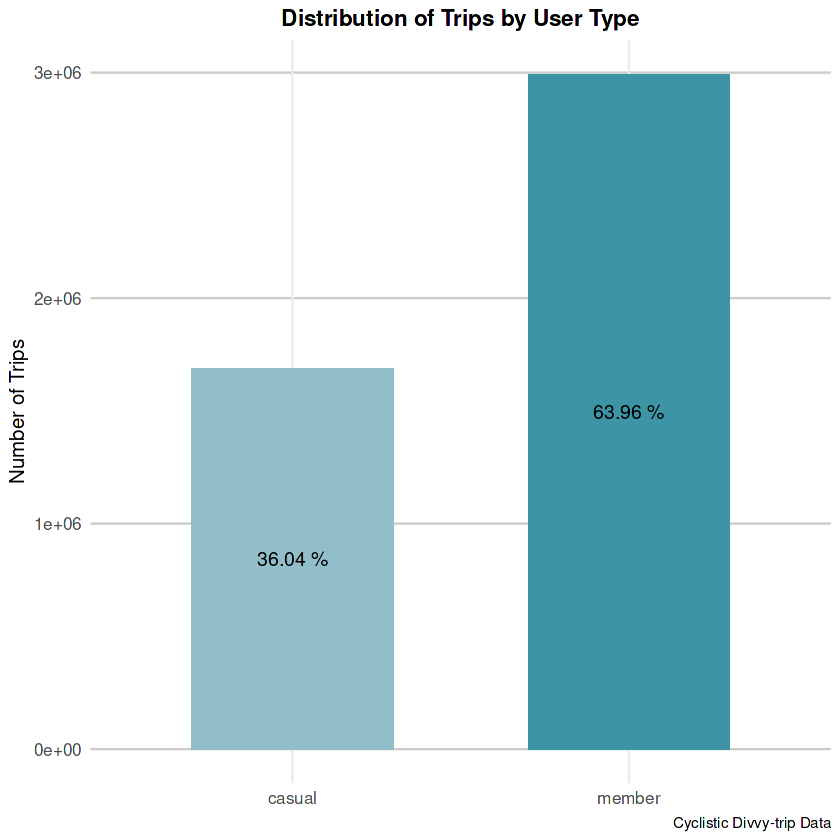

In [37]:
# Create stacked bar plot for user trips based on user type
 user_trips <- ggplot(user_trips_pivot, aes(x = user_type, y = numb_trips, fill = user_type)) +
  geom_col(width = 0.6) +
  labs(y = "Number of Trips",
       title = "Distribution of Trips by User Type",
       caption = "Cyclistic Divvy-trip Data")+
  geom_text(aes(label = paste0(pers_trips, " %")), 
            position = position_stack(vjust = 0.5), 
            color = "black", size = 4) +
  scale_fill_manual(values = c(lighter_color,original_color)) +
  theme_minimal() +
  theme(
    legend.position = "none",
    panel.grid.major.y = element_line(color = "grey80"),
    panel.grid.minor.y = element_blank(),
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.title = element_blank(),
    legend.text = element_text(size = 10)
  ) + 
  xlab(NULL) 


file_name <- "user_trips.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_trips, width = 8, height = 6, dpi = 300)

# Print the plot
user_trips

In [38]:
# Generate pivot table for user trips based on user type and bike type
user_bike_pivot <- generate_pivot_table(user_type, bike_type)
user_bike_pivot

user_type,bike_type,numb_trips,total_numb_trips,pers_trips,min_duration,max_duration,average_duration,mode_duration,median_duration,min_distance_km,max_distance_km,average_distance_km,mode_distance_km,median_distance_km,min_average_speed,max_average_speed,mean_average_speed,mode_average_speed,median_average_speed
<chr>,<chr>,<int>,<int>,<dbl>,<time>,<time>,<time>,<time>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,classic_bike,621554,4680892,13.28,00:00:05,24:59:55,00:22:46,00:07:09,00:13:38,0.004,29.685,2.246,1.317,1.691,0.01,56.69,8.49,9.02,8.81
casual,electric_bike,1065609,4680892,22.77,00:00:01,08:00:27,00:15:12,00:05:43,00:10:23,0.001,36.512,2.265,1.112,1.721,0.01,59.95,11.36,0.01,11.59
member,classic_bike,1430845,4680892,30.57,00:00:03,24:59:56,00:12:48,00:04:35,00:09:04,0.004,27.488,1.980,1.024,1.421,0.01,59.84,10.35,10.80,10.47
member,electric_bike,1562884,4680892,33.39,00:00:01,08:01:24,00:11:11,00:04:34,00:08:10,0.001,37.679,2.299,1.112,1.674,0.01,60.00,13.56,0.01,13.74


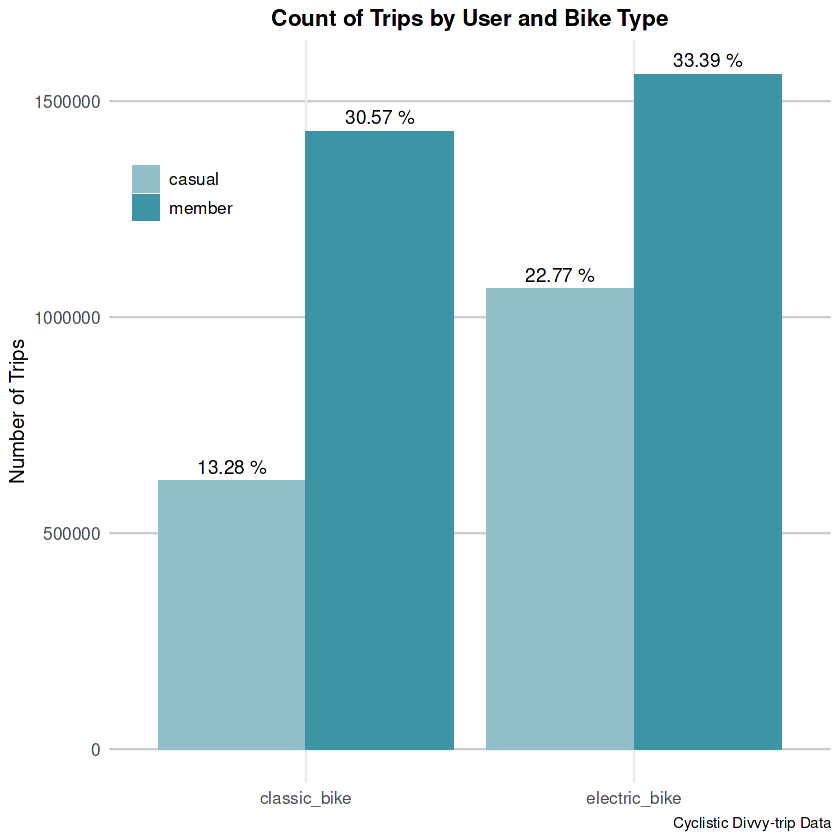

In [39]:
# Plot count of member and casual riders by bike type
user_bike <- ggplot(user_bike_pivot, aes(x = bike_type, y = numb_trips, fill = user_type)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = paste0(pers_trips, " %")), 
            position = position_dodge(width = 0.9), vjust = -0.5) +
  labs(y = "Number of Trips",
       title = "Count of Trips by User and Bike Type",
       caption = "Cyclistic Divvy-trip Data") +
  scale_fill_manual(values = c(lighter_color,original_color)) +
  theme_minimal() +
  theme(
    legend.position = c(0.1, 0.8),
    panel.grid.major.y = element_line(color = "grey80"),
    panel.grid.minor.y = element_blank(),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5),  
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.title = element_blank(),
    legend.text = element_text(size = 10)
  ) +
  xlab(NULL)


file_name <- "user_bike.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike, width = 8, height = 6, dpi = 300)

# Print the plot
user_bike

Warning message:
“Removed 1060 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1060 rows containing non-finite values (`stat_ydensity()`).”


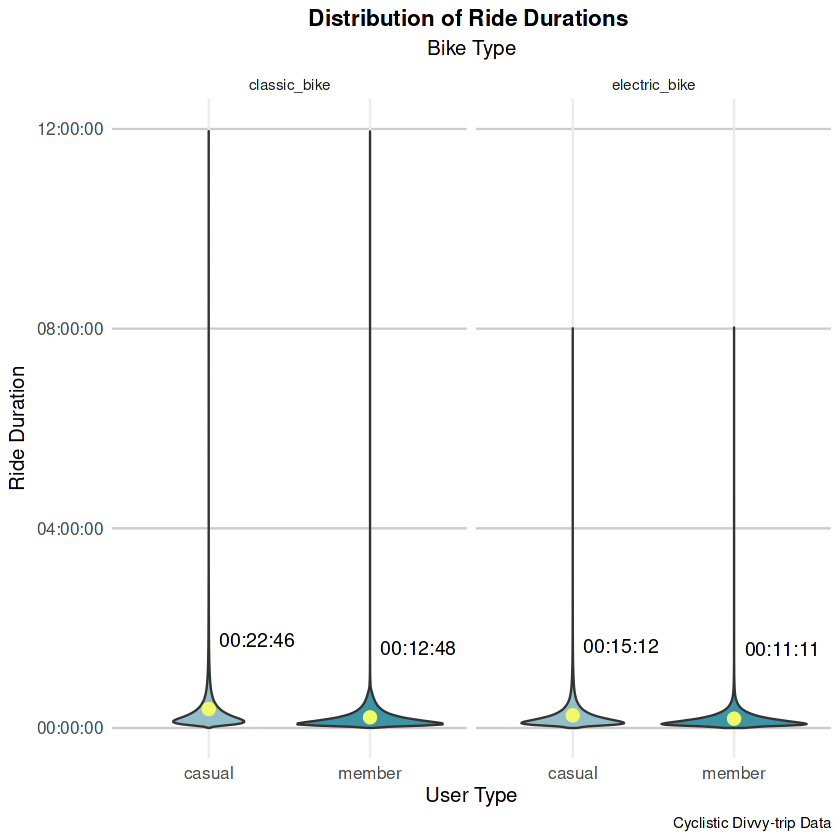

In [40]:
# Create the violin plot with average points for user trips based on user type and bike type
user_bike_duration <- ggplot(df_combined, aes(x = user_type, y = ride_duration, fill = user_type)) +
  geom_violin() +
  geom_point(data = user_bike_pivot, aes(x = user_type, y = average_duration), color = "#f0fa66", size = 3) +
  geom_text(data = user_bike_pivot, aes(x = user_type, y = average_duration, label = average_duration), 
            nudge_x = 0.3, nudge_y = 5000, size = 4, color = "black") +
  labs(x = "User Type", 
       y = "Ride Duration", 
       title = "Distribution of Ride Durations ",
       subtitle = "Bike Type",
       caption = "Cyclistic Divvy-trip Data") +
  scale_fill_manual(values = c(lighter_color,original_color)) +
  theme_minimal() +
  theme(
    legend.position = "none",
    panel.grid.major.y = element_line(color = "grey80"),
    panel.grid.minor.y = element_blank(),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5,size = 12),  
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.title = element_blank(),
    legend.text = element_text(size = 10)
  ) +
  scale_y_time(limits = c(hms::as_hms("00:00:00"), hms::as_hms("12:00:00")))+
  facet_grid(. ~ bike_type, scales = "free")
  
# Print the plot
user_bike_duration

file_name <- "user_bike_duration.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_duration, width = 8, height = 6, dpi = 300)
    

In [41]:
# Define the name mapping for combinations of user type and bike type
name_mapping <- c("casual.classic_bike" = "casual on classic bike",
                  "casual.electric_bike" = "casual on electric eike",
                  "member.classic_bike" = "member on classic bike",
                  "member.electric_bike" = "member on electric bike")

Warning message:
“Removed 385 rows containing non-finite values (`stat_density_ridges()`).”
Warning message:
“Removed 385 rows containing non-finite values (`stat_density_ridges()`).”


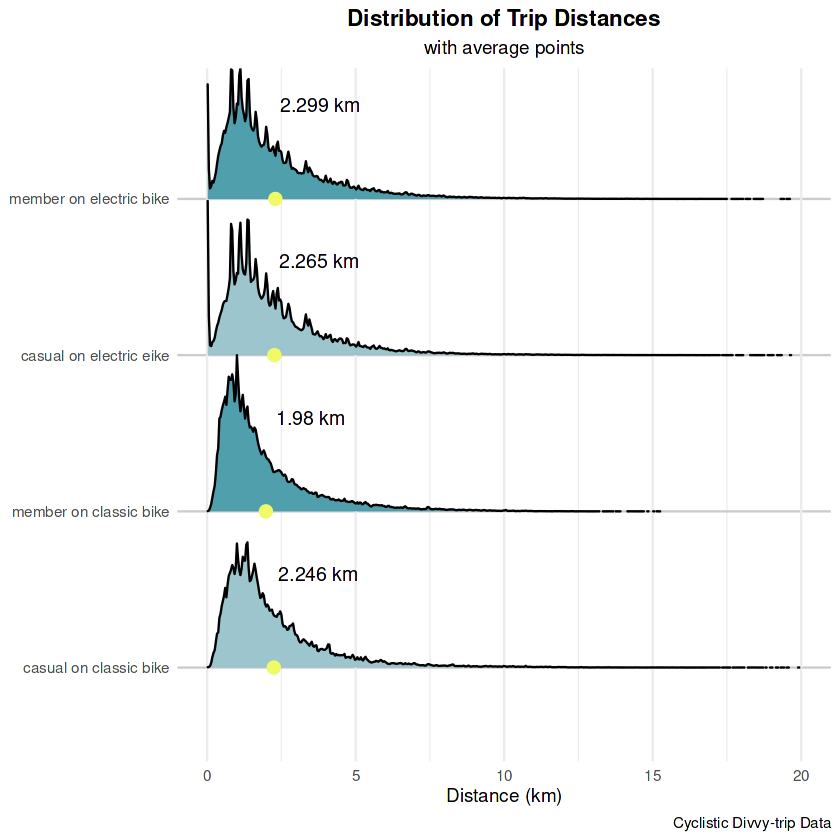

In [42]:
# Create the ridgeline plot with average points for distribution of trip distances for user trips based on user type and bike type
user_bike_distances <- ggplot(df_combined, aes(x = distance_km, y = interaction(user_type, bike_type), fill = user_type)) +
  geom_density_ridges(scale = 1, rel_min_height = 0.0001, alpha = 0.9, bandwidth = 0.02) +
  geom_text(data = user_bike_pivot, aes(x = average_distance_km, y = interaction(user_type, bike_type),
                                        label = paste0(average_distance_km," km")),
            nudge_x = 1.5, nudge_y = 0.6, size = 4, color = "black") +
  stat_summary(data = user_bike_pivot, aes(x = average_distance_km, y = interaction(user_type, bike_type)),
               fun = "mean", geom = "point", size = 3, color = "#f0fa66") +
  labs(x = "Distance (km)", 
       title = "Distribution of Trip Distances",
       subtitle = "with average points",
       caption = "Cyclistic Divvy-trip Data") +
  scale_fill_manual(values = c(lighter_color,original_color)) +
  theme_minimal() +
  theme(
    legend.position = "none",
    panel.grid.major.y = element_line(color = "grey80"),
    panel.grid.minor.y = element_blank(),
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.title.y = element_blank(),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  xlim(0, 20)+
  scale_y_discrete(labels = name_mapping)


# Print the plot
user_bike_distances

file_name <- "user_bike_distances.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_distances, width = 8, height = 6, dpi = 300)
    

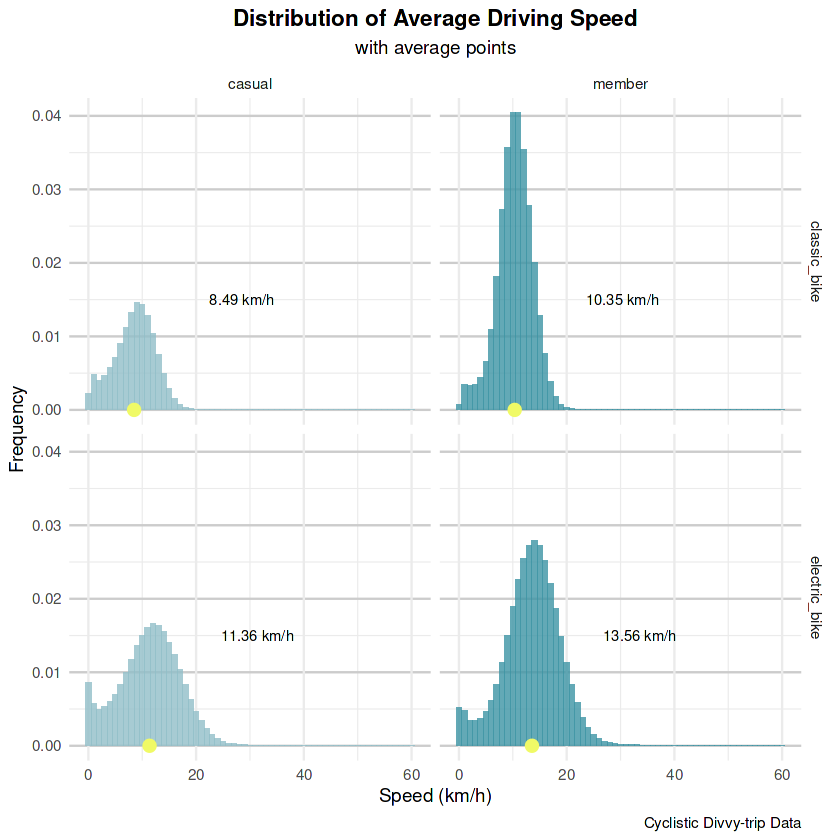

In [43]:
# Create the histogram plot with mean points for speed of users trips based on user type and bike type using frequency
user_bike_speed <- ggplot(df_combined, aes(x = average_speed_km_h, fill = user_type)) +
  geom_histogram(aes(y = after_stat(count) / sum(after_stat(count))), binwidth = 1, position = "dodge", alpha = 0.8) +
  geom_text(data = user_bike_pivot, aes(x = mean_average_speed, y = 0,
                                      label = paste(mean_average_speed, "km/h")),
           nudge_x = 20, nudge_y = 0.015, size = 3, color = "black") +
  stat_summary(data = user_bike_pivot, aes(x = mean_average_speed, y = 0),
               fun = "mean", geom = "point", size = 3, color = "#f0fa66") +
  labs(x = "Speed (km/h)",
       title = "Distribution of Average Driving Speed",
       subtitle = "with average points",
       caption = "Cyclistic Divvy-trip Data") +
  scale_fill_manual(values = c(lighter_color,original_color)) +
  theme_minimal()+ 
  theme(
    legend.position = "none",
    panel.grid.major.y = element_line(color = "grey80"),
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  )  +
facet_grid(bike_type ~ user_type, scales = "free_x") +
ylab("Frequency")


# Print the plot
user_bike_speed

file_name <- "user_bike_speed.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_speed, width = 8, height = 6, dpi = 300)
    

In [44]:
# Top 10 stations for each user type based on the count of trips 
top_10_start_stations <- df_combined %>%
  group_by(user_type, start_station_name) %>%
  summarise(count_of_trips = n(), .groups = "drop") %>%
  arrange(user_type, desc(count_of_trips)) %>%
  group_by(user_type) %>%
  top_n(10, count_of_trips) %>%
  arrange(user_type, desc(count_of_trips)) %>%
  ungroup()

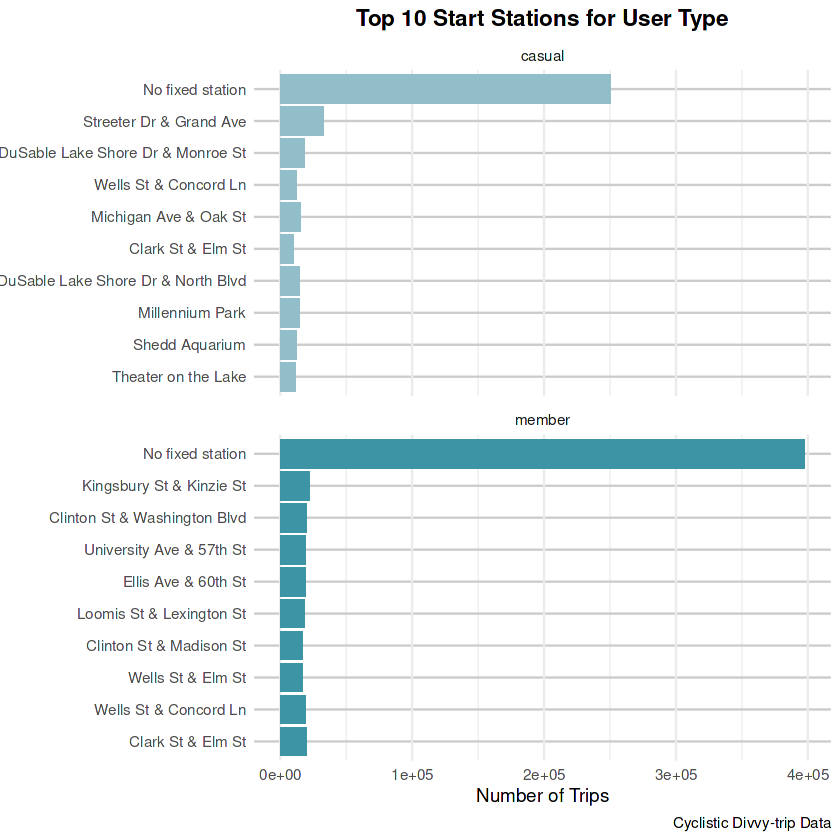

In [45]:
# Plot the top stations for each user type
top_start_stations <- ggplot(top_10_start_stations) +
  geom_col(position = "dodge", mapping = aes(x = count_of_trips, y = reorder(start_station_name, count_of_trips), fill = user_type)) +
  scale_fill_manual(values = c(lighter_color,original_color)) +
  labs(title = "Top 10 Start Stations for User Type",
       caption = "Cyclistic Divvy-trip Data",
       x = "Number of Trips",
       fill = "User") +
  facet_wrap(~user_type, scales = "free_y", ncol = 1) +
  theme_minimal()+
  theme(
    legend.position = "none",
    legend.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major.y = element_line(color = "grey80"),
    panel.grid.minor.y = element_blank(),
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  ylab(NULL)

file_name <- "top_start_stations.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = top_start_stations, width = 8, height = 6, dpi = 300)

# Print the plot
top_start_stations

In [46]:
# Top 10 routes for each user type based on the count of trips
top_routes <- df_combined %>%
  group_by(user_type, start_station_name, end_station_name) %>%
  summarise(count_of_trips = n(), .groups = "drop") %>%
  arrange(user_type, desc(count_of_trips)) %>%
  group_by(user_type) %>%
  top_n(30, count_of_trips) %>%
  arrange(user_type, desc(count_of_trips)) %>%
  ungroup()

# Save the data as a CSV file
write_csv(top_routes, "/kaggle/working/data_tables/top_30_routes.csv")

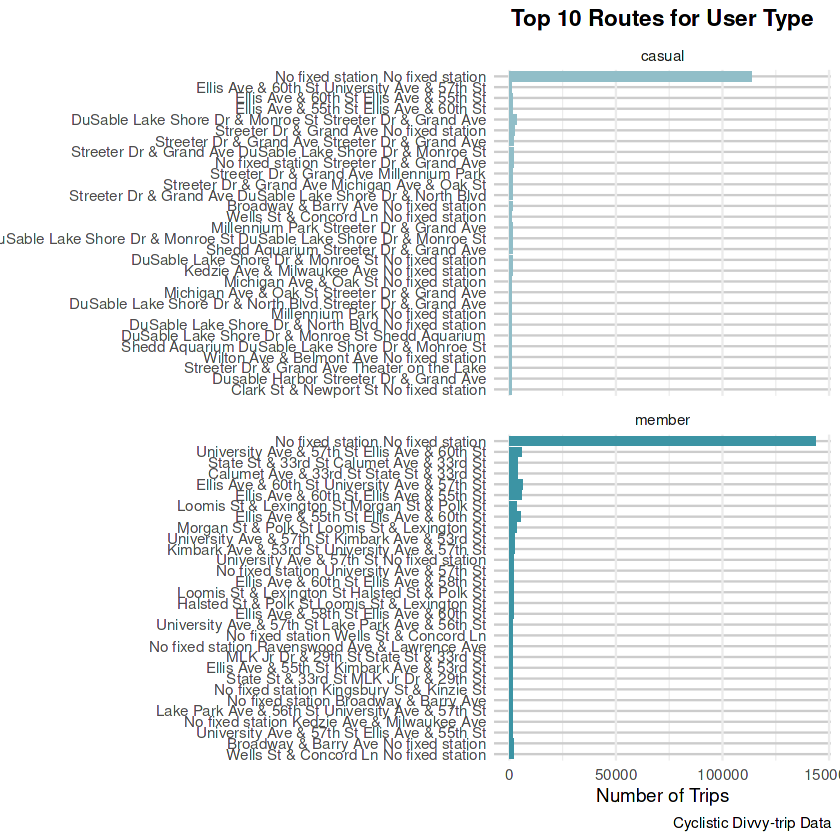

In [47]:
# Plot the top routes for each user type
top_routes_plot <- ggplot(top_routes) +
  geom_col(position = "dodge", mapping = aes(x = count_of_trips, y = reorder(paste(start_station_name, end_station_name), count_of_trips), fill = user_type)) +
  scale_fill_manual(values = c(lighter_color, original_color)) +
  labs(title = "Top 10 Routes for User Type",
       caption = "Cyclistic Divvy-trip Data",
       x = "Number of Trips",
       fill = "User") +
  facet_wrap(~ user_type, scales = "free_y", ncol = 1) +
  theme_minimal() +
  theme(
    legend.position = "none",
    legend.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major.y = element_line(color = "grey80"),
    panel.grid.minor.y = element_blank(),
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  ylab(NULL)

# Save the plot as an image file
file_name <- "top_routes.png"
ggsave(file.path(plot_dir, file_name), plot = top_routes_plot, width = 8, height = 6, dpi = 300)

# Print the plot
top_routes_plot


In [48]:
# Generate pivot table for user trips based on user type, bike type, and month
user_bike_month_pivot <- generate_pivot_table(user_type, bike_type, month)
head(user_bike_month_pivot,3)

user_type,bike_type,month,numb_trips,total_numb_trips,pers_trips,min_duration,max_duration,average_duration,mode_duration,⋯,min_distance_km,max_distance_km,average_distance_km,mode_distance_km,median_distance_km,min_average_speed,max_average_speed,mean_average_speed,mode_average_speed,median_average_speed
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<time>,<time>,<time>,<time>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,classic_bike,1,12894,4680892,0.28,00:00:55,24:59:54,00:16:58,00:05:53,⋯,0.082,24.263,1.656,1.024,1.277,0.01,22.77,9.42,8.81,9.75
casual,classic_bike,2,14201,4680892,0.30,00:00:53,24:22:25,00:19:00,00:06:22,⋯,0.070,22.805,1.819,1.024,1.364,0.02,46.10,9.16,9.49,9.55
casual,classic_bike,3,17720,4680892,0.38,00:00:53,23:47:34,00:18:49,00:04:19,⋯,0.047,20.577,1.865,1.024,1.401,0.04,31.71,9.05,9.58,9.40


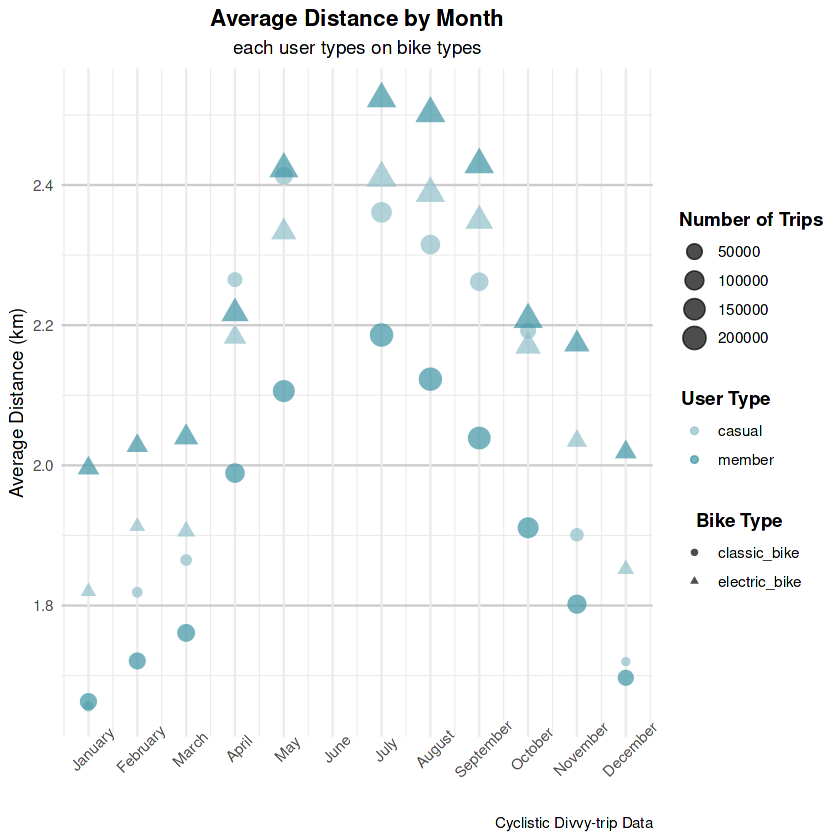

In [49]:
# Scatter plot of average distance by user type, month, and bike type
user_bike_month_distances <- ggplot(user_bike_month_pivot, aes(x = month, y = average_distance_km, color = user_type, shape = bike_type, size = numb_trips)) +
  geom_point(alpha = 0.7) +
  labs( y = "Average Distance (km)", 
       color = "User Type", 
       shape = "Bike Type", 
       size = "Number of Trips",
       title = "Average Distance by Month",
       subtitle = "each user types on bike types",
       caption = "Cyclistic Divvy-trip Data") +
  scale_size_continuous(range = c(2, 6)) + 
  scale_color_manual(values = c(lighter_color,original_color)) +
   scale_x_continuous(breaks = 1:12, labels = month.name[1:12])+
  theme_minimal() +
  theme(
    legend.position = "right",
    legend.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major.y = element_line(color = "grey80"),
    axis.text.x = element_text(angle = 45, hjust = 0.5),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  xlab(NULL)

# Print the plot
user_bike_month_distances

file_name <- "user_bike_month_distances.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_month_distances, width = 8, height = 6, dpi = 300)
    

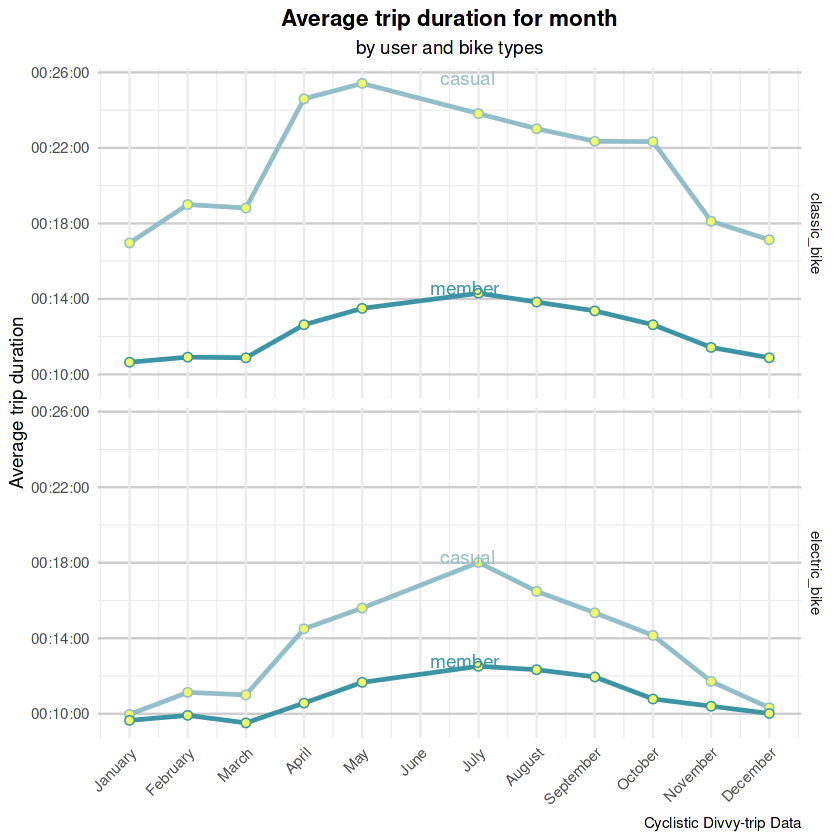

In [50]:
# The line plot of average trip duration for month for groups user on bikes 
user_bike_month_duration<- ggplot(user_bike_month_pivot, aes(x = month, y = average_duration, color = user_type )) +
  geom_line(aes(color = user_type), linewidth = 1) +
  geom_point(size = 2, shape = 21, fill = "#f0fa66") +  
  geom_text(data = user_bike_month_pivot %>% 
            group_by(user_type, bike_type) %>% 
            summarize(label_avg = max(average_duration),.groups = "drop"), 
                      aes(x = 7, y = label_avg, label = user_type), 
                      hjust = 0.7,
                      vjust = 0.1)+
  facet_grid(bike_type ~ .,) +
  labs(y = "Average trip duration", 
       title = "Average trip duration for month",
       subtitle = "by user and bike types",
       caption = "Cyclistic Divvy-trip Data") +
  scale_x_continuous(breaks = 1:12, labels = month.name[1:12])+
  scale_color_manual(values = c(lighter_color, original_color)) +
  theme_minimal() +
  theme(
    legend.position = "none",
    legend.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major.y = element_line(color = "grey80"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  )+ 
  xlab(NULL)

# Print the plot
user_bike_month_duration

file_name <- "user_bike_month_duration.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_month_duration, width = 8, height = 6, dpi = 300)
    

In [51]:
# Generate pivot table for user trips based on user type, bike type, and day of week
user_bike_day_of_week_pivot <- generate_pivot_table(user_type, bike_type, day_of_week)
head(user_bike_day_of_week_pivot,4)

user_type,bike_type,day_of_week,numb_trips,total_numb_trips,pers_trips,min_duration,max_duration,average_duration,mode_duration,⋯,min_distance_km,max_distance_km,average_distance_km,mode_distance_km,median_distance_km,min_average_speed,max_average_speed,mean_average_speed,mode_average_speed,median_average_speed
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<time>,<time>,<time>,<time>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,classic_bike,1,104294,4680892,2.23,00:00:31,24:45:58,00:25:42,00:09:01,⋯,0.015,27.673,2.377,1.317,1.787,0.01,56.69,8.01,9.24,8.28
casual,classic_bike,2,67900,4680892,1.45,00:00:52,24:59:52,00:22:27,00:06:30,⋯,0.005,29.086,2.150,1.317,1.599,0.01,31.71,8.50,8.91,8.87
casual,classic_bike,3,71364,4680892,1.52,00:00:51,24:59:54,00:20:35,00:05:30,⋯,0.047,25.240,2.152,1.024,1.615,0.01,46.10,8.96,8.97,9.31
casual,classic_bike,4,74430,4680892,1.59,00:00:45,24:59:53,00:19:56,00:07:09,⋯,0.007,25.761,2.141,1.024,1.623,0.01,54.07,9.03,10.47,9.37


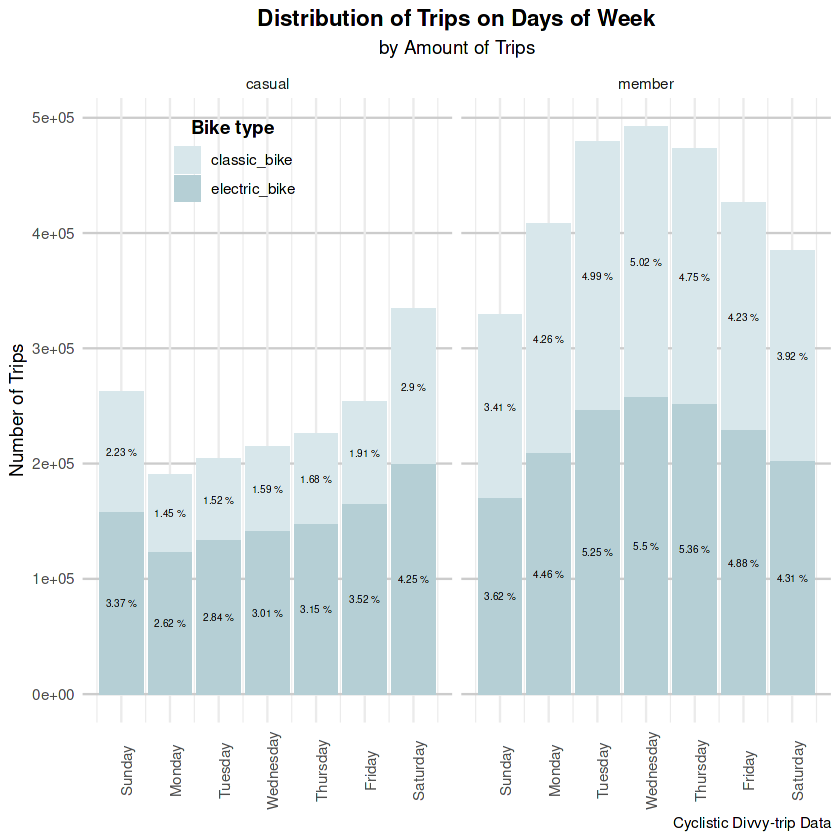

In [52]:
# Create the stacked bar plot with proportional filling and for users on  bikes on day of week
user_bike_day_of_week <- ggplot(user_bike_day_of_week_pivot, aes(x = day_of_week, fill = bike_type, y = numb_trips)) +
  geom_bar(position = "stack", stat = "identity") +
  geom_text(aes(label = paste0(pers_trips, " %")), 
            position = position_stack(vjust = 0.5), size = 2, color = "black") +
  labs(y = "Number of Trips",
       fill = "Bike type",
       title = "Distribution of Trips on Days of Week",
       subtitle = "by Amount of Trips",
       caption = "Cyclistic Divvy-trip Data") +
  scale_x_continuous(breaks = 1:7, labels = weekdays) +
  scale_fill_manual(values = colors[c(4, 3)], labels = name_mapping) +
  facet_wrap(~ user_type, nrow = 1, scales = "free_x") +
  theme_minimal() +
  theme(
    legend.position = c(0.2,0.9),
    legend.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major.y = element_line(color = "grey80"),
    panel.grid.minor.y = element_blank(),
    axis.text.x = element_text(angle = 90, hjust = 0.5),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  xlab(NULL)


# Print the plot
user_bike_day_of_week

file_name <- "user_bike_day_of_week.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_day_of_week, width = 8, height = 6, dpi = 300)
    

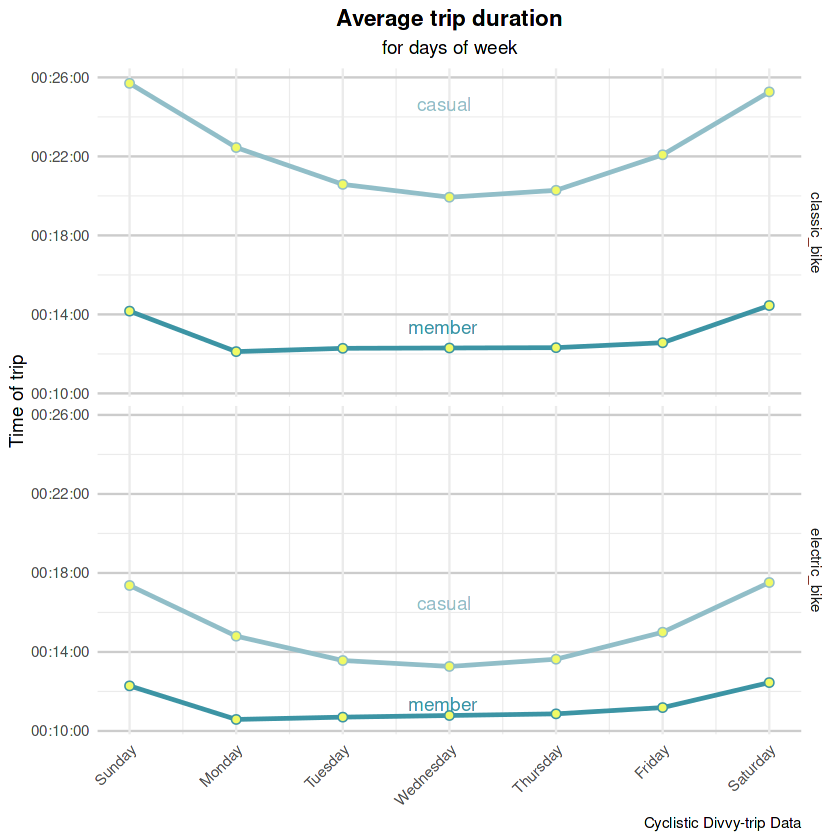

In [53]:
# Line plot with average trip durations for user groups on bikes on day of week 
user_bike_day_of_week_duration <- ggplot(user_bike_day_of_week_pivot, aes(x = day_of_week, y = average_duration, color = user_type)) +
  geom_line(aes(color = user_type), linewidth = 1) +
  geom_point(size = 2, shape = 21, fill = "#f0fa66") +
  geom_text(data = user_bike_day_of_week_pivot %>% group_by(user_type, bike_type) %>% summarize(label_avg = max(average_duration),.groups = "drop"), 
            aes(x = 4, y = label_avg, label = user_type), hjust = 0.6, vjust = 2) +  
  scale_x_continuous(breaks = 1:7, labels = weekdays) +
  scale_color_manual(values = c(lighter_color,original_color)) +
  facet_grid(bike_type ~ .,scales = "free_x",space = "free_x") +
  labs(y = "Time of trip", 
       title = "Average trip duration",
       subtitle = "for days of week",
       caption = "Cyclistic Divvy-trip Data") +
  theme_minimal() +
  theme(
    legend.position = "none",
    legend.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major.y = element_line(color = "grey80"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  xlab(NULL)


# Print the plot
user_bike_day_of_week_duration

file_name <- "user_bike_day_of_week_duration.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_day_of_week_duration, width = 8, height = 6, dpi = 300)
    

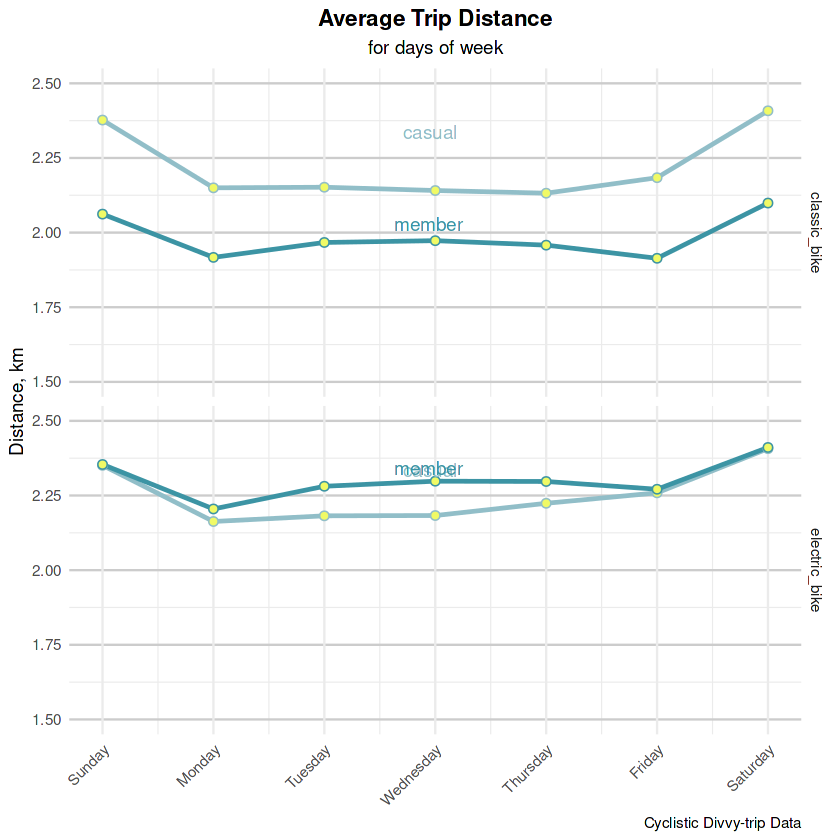

In [54]:
# Line plot with average trip distances for user groups on bikes on day of week 
user_bike_day_of_week_distance <- ggplot(user_bike_day_of_week_pivot, aes(x = day_of_week, y = average_distance_km, color = user_type)) +
  geom_line(aes(color = user_type), linewidth = 1) +
  geom_point(size = 2, shape = 21, fill = "#f0fa66") +
  geom_text(data = user_bike_day_of_week_pivot %>% group_by(user_type, bike_type) %>% summarize(label_avg = max(average_distance_km),.groups = "drop"), 
            aes(x = 4, y = label_avg, label = user_type), hjust = 0.6, vjust = 2) +  
  scale_x_continuous(breaks = 1:7, labels = weekdays) +
  scale_color_manual(values = c(lighter_color,original_color)) +
  facet_grid(bike_type ~ .,scales = "free_x",space = "free_x") +
  labs(y = "Distance, km", 
       title = "Average Trip Distance",
       subtitle = "for days of week",
       caption = "Cyclistic Divvy-trip Data") +
  theme_minimal() +
  theme(
    legend.position = "none",
    legend.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major.y = element_line(color = "grey80"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  xlab(NULL)+
  ylim(1.5,2.5)


# Print the plot
user_bike_day_of_week_distance

file_name <- "user_bike_day_of_week_distance.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_day_of_week_distance, width = 8, height = 6, dpi = 300)
    

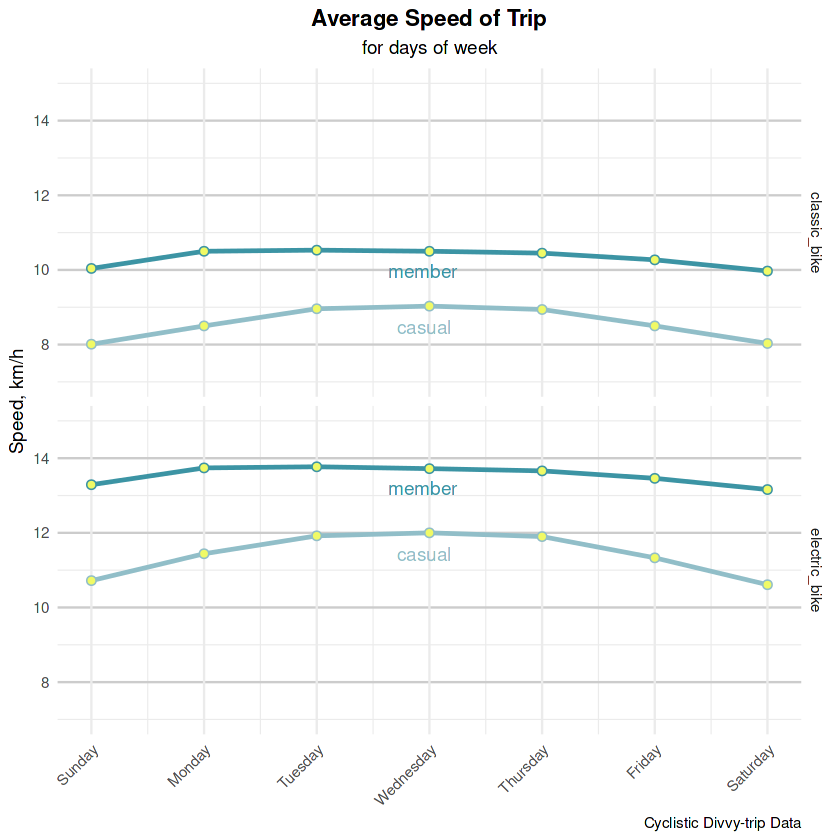

In [55]:
# Line plot average speed of trip for user groups on bikes on day of week 
user_bike_day_of_week_speed <- ggplot(user_bike_day_of_week_pivot, aes(x = day_of_week, y = mean_average_speed, color = user_type)) +
  geom_line(aes(color = user_type), linewidth = 1) +
  geom_point(size = 2, shape = 21, fill = "#f0fa66") +
  geom_text(data = user_bike_day_of_week_pivot %>% group_by(user_type, bike_type) %>% summarize(label_avg = max(mean_average_speed),.groups = "drop"), 
            aes(x = 4, y = label_avg, label = user_type), hjust = 0.6, vjust = 2) +  
  scale_x_continuous(breaks = 1:7, labels = weekdays) +
  scale_color_manual(values = c(lighter_color,original_color)) +
  facet_grid(bike_type ~ .,scales = "free_x",space = "free_x") +
  labs(y = "Speed, km/h", 
       title = "Average Speed of Trip",
       subtitle = "for days of week",
       caption = "Cyclistic Divvy-trip Data") +
  theme_minimal() +
  theme(
    legend.position = "none",
    legend.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major.y = element_line(color = "grey80"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  xlab(NULL)+
  ylim(7,15)


# Print the plot
user_bike_day_of_week_speed

file_name <- "user_bike_day_of_week_speed.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_day_of_week_speed, width = 8, height = 6, dpi = 300)
    

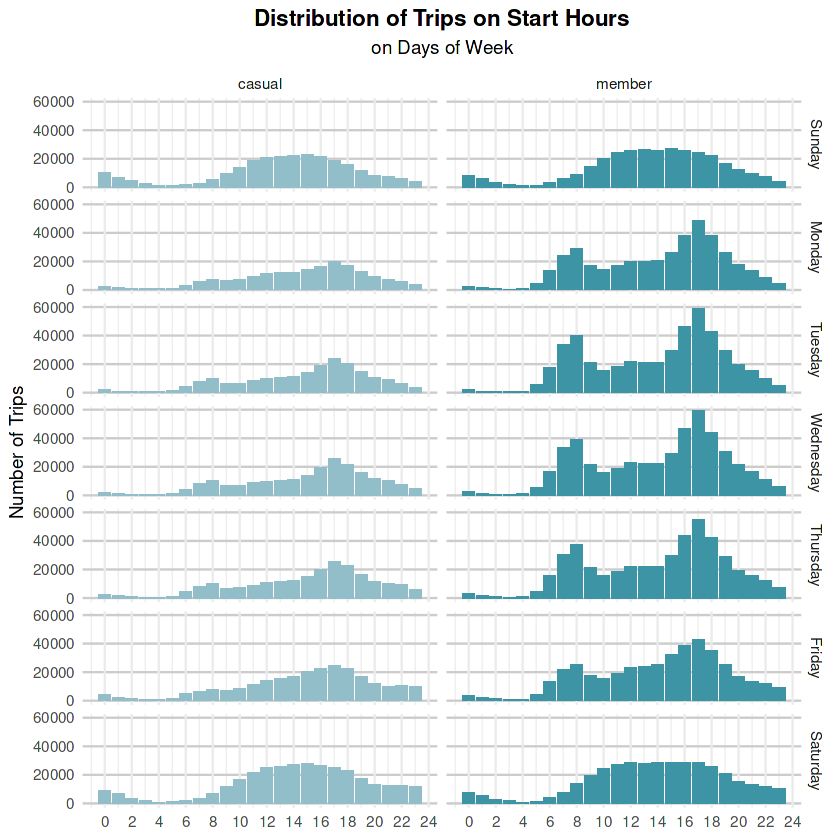

In [56]:
# Group by user_type and day_of_week and calculate the count of rides
rides_by_user_type_start_hour <- df_combined %>%
  mutate(name_day_of_week = factor(name_day_of_week, levels = weekdays)) %>%
  group_by(user_type, name_day_of_week, start_hour) %>%
  summarise(count_of_rides = n(), .groups = "drop")

# Bar plot for distribution of trips on start hours on days of week
rides_user_start_hour <- ggplot(rides_by_user_type_start_hour, aes(x = start_hour, y = count_of_rides, fill = user_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(y = "Number of Trips",
       title = "Distribution of Trips on Start Hours",
       subtitle = "on Days of Week") +
  scale_x_continuous(breaks = seq(0, 24, by = 2)) +
  scale_fill_manual(values = c(lighter_color,original_color))+
  theme_minimal() +
  theme(
    legend.position = "none",
    panel.grid.major.y = element_line(color = "grey80"),
    panel.grid.minor.y = element_blank(),
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  facet_grid(name_day_of_week ~ user_type) +
  xlab(NULL)


file_name <- "rides_user_start_hour.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = rides_user_start_hour, width = 8, height = 6, dpi = 300)

rides_user_start_hour


In [57]:
# Generate pivot table for user trips based on user type, bike type, and start hour
user_bike_start_hour_pivot <- generate_pivot_table(user_type, bike_type, start_hour)
head(user_bike_start_hour_pivot,4)

user_type,bike_type,start_hour,numb_trips,total_numb_trips,pers_trips,min_duration,max_duration,average_duration,mode_duration,⋯,min_distance_km,max_distance_km,average_distance_km,mode_distance_km,median_distance_km,min_average_speed,max_average_speed,mean_average_speed,mode_average_speed,median_average_speed
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<time>,<time>,<time>,<time>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,classic_bike,0,10381,4680892,0.22,00:00:31,24:59:52,00:21:02,00:07:40,⋯,0.015,19.526,1.898,0.862,1.507,0.02,22.58,9.06,11.69,9.45
casual,classic_bike,1,7104,4680892,0.15,00:01:16,22:38:17,00:22:03,00:06:31,⋯,0.111,15.435,1.955,0.862,1.563,0.02,21.89,9.17,12.35,9.55
casual,classic_bike,2,4133,4680892,0.09,00:01:10,22:47:29,00:21:02,00:10:16,⋯,0.047,11.182,1.996,1.516,1.547,0.04,20.82,9.26,11.44,9.63
casual,classic_bike,3,2217,4680892,0.05,00:01:08,15:41:10,00:20:22,00:07:07,⋯,0.015,13.350,2.028,2.671,1.554,0.02,19.56,9.41,12.96,9.75


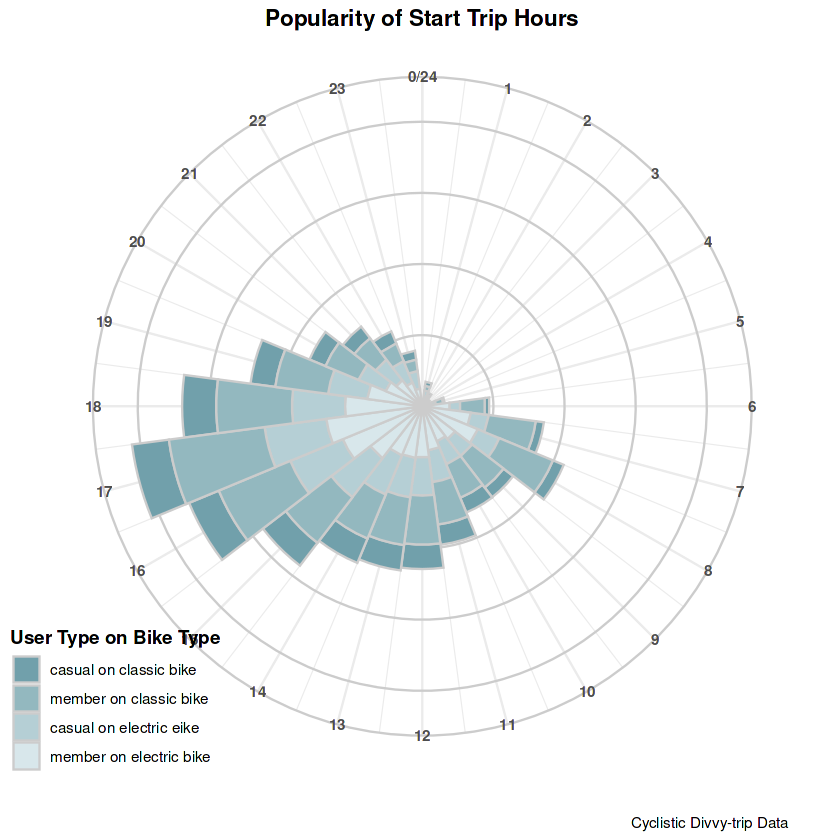

In [58]:
# Plot of popularity of start trip hours for users on bikes
user_bike_start_hour <- ggplot(user_bike_start_hour_pivot, aes(x = start_hour, y = pers_trips, fill = interaction(user_type, bike_type))) +
  geom_bar(width = 1, colour = "grey80", stat = "identity", na.rm = TRUE) +
  labs(title = "Popularity of Start Trip Hours", 
       caption = "Cyclistic Divvy-trip Data",
       fill = "User Type on Bike Type") +
  scale_fill_manual(values = colors, labels = name_mapping) +
  ylab(NULL) +
  scale_y_continuous(labels = NULL) +
  coord_polar(start = 0) +
  scale_x_continuous("", limits = c(0, 24), breaks = seq(0, 24), labels = seq(0, 24)) +
  theme_minimal() + 
  theme(
    legend.position = c(0.08, 0.1),
    legend.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major.y = element_line(color = "grey80"),
    panel.grid.minor.y = element_blank(),
    axis.text.x = element_text(angle = 0, hjust = 0.5,face = "bold"),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  )

user_bike_start_hour

file_name <- "user_bike_start_hour.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = user_bike_start_hour, width = 8, height = 6, dpi = 300)


If we define "Morning" as 06:00-09:00 hours, "Day"as 10:00-09:17 hours, "Evening" as 18:00-21:00 hours, "Night" as 22:00-24:00 and 00:00-05:00 hours then we can follow how far and how fast users ride in spesifiyed period of the day 

In [59]:
# Define the periods and corresponding hour ranges and parts of the day
periods <- c("Morning", "Day", "Evening", "Night")
hour_ranges <- list(
  morning = 6:9,
  day = 10:17,
  evening = 18:21,
  night = c(22:24, 0:5)
)

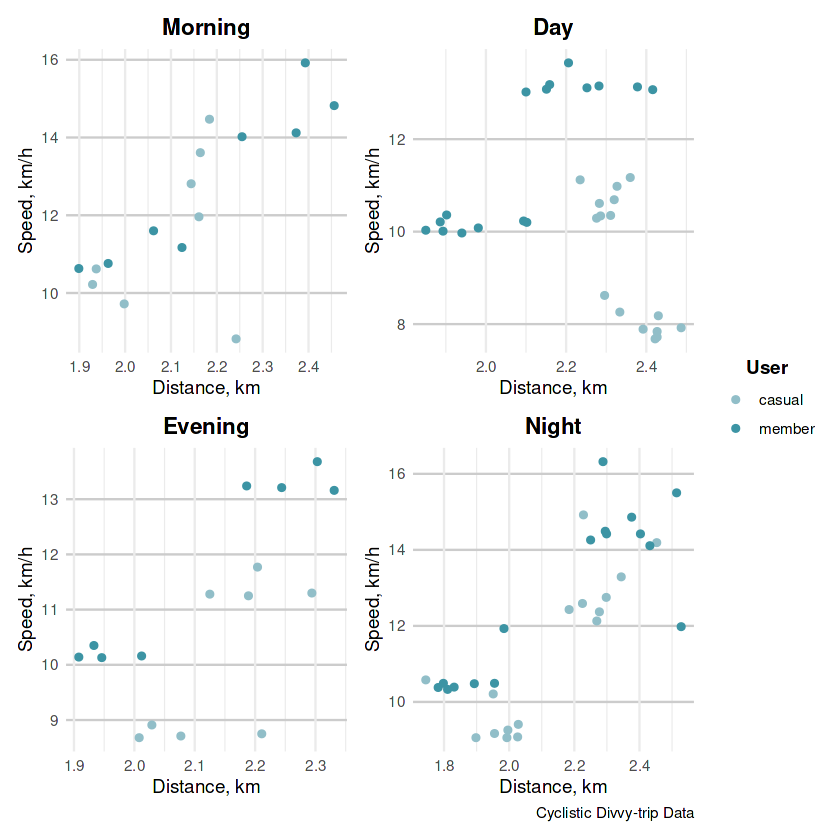

In [60]:
# Create a list to store the plots
scatter_plots <- list()

# Iterate over each period
for (i in seq_along(periods)) {
  period <- periods[i]
  hour_range <- hour_ranges[[i]]
  
  # Subset the data for the current period
  subset_data <- subset(user_bike_start_hour_pivot, start_hour %in% hour_range)
  
  # Create the scatter plot for the current period
  scatter_plot <- ggplot(subset_data, aes(x = average_distance_km, y = mean_average_speed, color = user_type)) +
    geom_point() +
    scale_color_manual(values = c(lighter_color,original_color)) +
    labs(x = "Distance, km", 
         y = "Speed, km/h",
         color = "User") +
    theme_minimal() +
    ggtitle(period) +
    theme(
      legend.title = element_text(hjust = 0.5, face = "bold"),
      panel.grid.major.y = element_line(color = "grey80"),
      panel.grid.minor.y = element_blank(),
      axis.text.x = element_text(angle = 0, hjust = 0.5),
      plot.title = element_text(hjust = 0.5, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5)
    )
  
  # Store the plot in the list
  scatter_plots[[i]] <- scatter_plot
}

# Combine all scatter plots into a single plot with shared legend
day_part_distance_speed <- scatter_plots[[1]] + scatter_plots[[2]] + scatter_plots[[3]] + scatter_plots[[4]] +
  plot_layout(ncol = 2, nrow = 2, guides = "collect") + labs(caption = "Cyclistic Divvy-trip Data")

# Display the plot
day_part_distance_speed

file_name <- "day_part_distance_speed.png"
# Save the plot as an image file
ggsave(file.path(plot_dir, file_name), plot = day_part_distance_speed, width = 8, height = 6, dpi = 300)



# **Act**

## **Findings**

These conclusions, based only on this notebook, can be supplemented or changed after visualization in Tableau, which will be reflected in the presentation.

**According to the data for the last 12 months:**

- the share of non-subscribers is 37.19% of the total number of bicycle users, while members are 62.81%;
- subscribers and non-subscribers prefer to use electric bikes, while for regular subscribers the percentage difference is a small 2%, while 2/3 of all trips made by non-members are on electric bikes;
- since non-permanent members and permanent members cover the same distances on average, they move at different speeds. Non-subscribers ride 2 km/h slower on each of the bike types shown;
- if we consider trips in the light of cold (October-March) and warm months (April-September), then here everyone makes trips for shorter distances and with a much lower frequency in the cold season than in the warm season, but in the warm period on electric bicycles members ride longer distances, and non-members cover longer distances on classic bicycles;
- the difference in the duration of trips for members and non-members during all months is almost 10 minutes on classic bicycles in favor of non-subscription members, when on electric bicycles it exists and reaches up to 8 minutes only in summer;
- non-subscribers use bicycles more often on weekends than on weekdays with a minimum of trips on Monday, while subscribers - on the contrary - during weekdays with a peak in the middle of the week (Tuesday-Thursday);
- on weekends, trips are longer than on weekdays both among subscribers and potential subscribers;
- although all users ride distances during the week, which are on average within 2-2.5 km, but it takes them quite a lot of time, so subscribers on a classic bike ride the same distance as subscribers 8 minutes longer, and on the electric one it is 5 minutes longer;
- members have a prominent 2 popular time slots for using bikes 6-8 am and 3-6 pm during weekdays, while potential subscribers have the first very weak and the second coincide;
- the top 10 routes for members and non-members are different and actually do not match.



# **Data sources used** 
   * [Google Data Analytics Capstone: Complete a Case Study]( https://www.coursera.org/learn/google-data-analytics-capstone/home/week/1)
   * [How To Use Kaggle]( https://www.kaggle.com/docs)
   * [Cyclistic_bike_share data]( https://www.kaggle.com/datasets/thohiu/cyclistic-bike-share) 
   * [Getting Help with R]( https://www.r-project.org/help.html)
   * [Cyclistic-bike-share-data-12-months dataset]( https://www.kaggle.com/datasets/antonukolga/cyclistic-bike-share-data-12-months)
   * [Divvy-tripdata]( https://divvy-tripdata.s3.amazonaws.com/index.html)